## Placement Project: Bankrucpy Model

- Name: Murtaza kanchwala
- Email: murtazakanchwala1@gmail.com
- Phone: 8305309153

### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

### Reading the File 


In [2]:
df_bankrupcy = pd.read_csv("BANKRUPTCY PREDICTION .csv")
df_bankrupcy.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


### Copying the CSV File

In [3]:
company_df=df_bankrupcy.copy()

### Printing shape of the file 

In [4]:
print(f"The shape of the company_df is: {company_df.shape} \ncompany_df has {company_df.shape[1]} columns \ncompany_df has {company_df.shape[0]} rows")

The shape of the company_df is: (6819, 95) 
company_df has 95 columns 
company_df has 6819 rows


### Renaming the Columns

In [5]:
company_df.columns =company_df.columns.str.replace(" ","",n=1)

In [6]:
company_df.columns=company_df.columns.str.replace(" ","_",).str.replace("(","_").str.replace(")","_").str.replace("�","").str.replace("__","_")
company_df.columns

Index(['ROA_C_before_interest_and_depreciation_before_interest',
       'ROA_A_before_interest_and_%_after_tax',
       'ROA_B_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin', 'Realized_Sales_Gross_Margin',
       'Operating_Profit_Rate', 'Pre-tax_net_Interest_Rate',
       'After-tax_net_Interest_Rate',
       'Non-industry_income_and_expenditure/revenue',
       'Continuous_interest_rate_after_tax_', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest-bearing_debt_interest_rate', 'Tax_rate_A_',
       'Net_Value_Per_Share_B_', 'Net_Value_Per_Share_A_',
       'Net_Value_Per_Share_C_', 'Persistent_EPS_in_the_Last_Four_Seasons',
       'Cash_Flow_Per_Share', 'Revenue_Per_Share_Yuan_',
       'Operating_Profit_Per_Share_Yuan_',
       'Per_Share_Net_profit_before_tax_Yuan_',
       'Realized_Sales_Gross_Profit_Growth_Rate',
       'Operating_Profit_Growth_Rate', 'After-tax_Net_Profit_Growth_Rate',
    

In [7]:
company_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ROA_C_before_interest_and_depreciation_before_interest  6819 non-null   float64
 1   ROA_A_before_interest_and_%_after_tax                   6819 non-null   float64
 2   ROA_B_before_interest_and_depreciation_after_tax        6819 non-null   float64
 3   Operating_Gross_Margin                                  6819 non-null   float64
 4   Realized_Sales_Gross_Margin                             6819 non-null   float64
 5   Operating_Profit_Rate                                   6819 non-null   float64
 6   Pre-tax_net_Interest_Rate                               6819 non-null   float64
 7   After-tax_net_Interest_Rate                             6819 non-null   float64
 8   Non-industry_income_and_expenditure/re

- All the columns or features are numerical (int64 or float64)

### Checking for Null Values

In [8]:
null_count =0
not_null_count=0
for i in company_df:
    if company_df[i].isnull().sum() > 0:
        null_count+=1
    else:
        not_null_count+=1
print(f"{null_count} number of columns contains null values")
print(f"{not_null_count} number of columns does not contains any null values")

0 number of columns contains null values
95 number of columns does not contains any null values


### Checking for Duplicate values

In [9]:
print(f"The company_df contains {company_df.duplicated().sum()} duplicate rows.")

The company_df contains 0 duplicate rows.


In [10]:
company_df.describe()

,ROA_C_before_interest_and_depreciation_before_interest,ROA_A_before_interest_and_%_after_tax,ROA_B_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Realized_Sales_Gross_Margin,Operating_Profit_Rate,Pre-tax_net_Interest_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,Continuous_interest_rate_after_tax_,...,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,No-credit_Interval,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_DFL_,Interest_Coverage_Ratio_Interest_expense_to_EBIT_,Equity_to_Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578,0.032263
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477,0.000000
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798,0.000000
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Printing the Number of unique values in each columns

In [11]:
for i in company_df.columns:
    print(i,":",company_df[i].nunique())
    print("-----------------------------------------------------------------------------")

ROA_C_before_interest_and_depreciation_before_interest : 3333
-----------------------------------------------------------------------------
ROA_A_before_interest_and_%_after_tax : 3151
-----------------------------------------------------------------------------
ROA_B_before_interest_and_depreciation_after_tax : 3160
-----------------------------------------------------------------------------
Operating_Gross_Margin : 3781
-----------------------------------------------------------------------------
Realized_Sales_Gross_Margin : 3788
-----------------------------------------------------------------------------
Operating_Profit_Rate : 3376
-----------------------------------------------------------------------------
Pre-tax_net_Interest_Rate : 3789
-----------------------------------------------------------------------------
After-tax_net_Interest_Rate : 3604
-----------------------------------------------------------------------------
Non-industry_income_and_expenditure/revenue : 2551


### Checking the Target variable 

0    0.967737
1    0.032263
Name: Bankrupt, dtype: float64


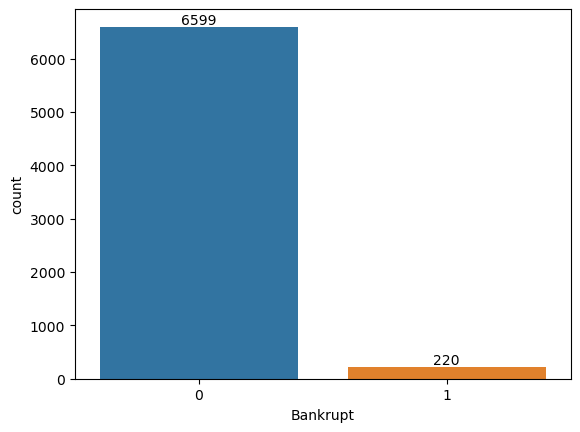

In [12]:
print(company_df.Bankrupt.value_counts(normalize=True))
fig=sns.countplot(x="Bankrupt", data =company_df)
fig.bar_label(fig.containers[0])
plt.show()

- The company_df is an imbalance dataset

### Visualising some features

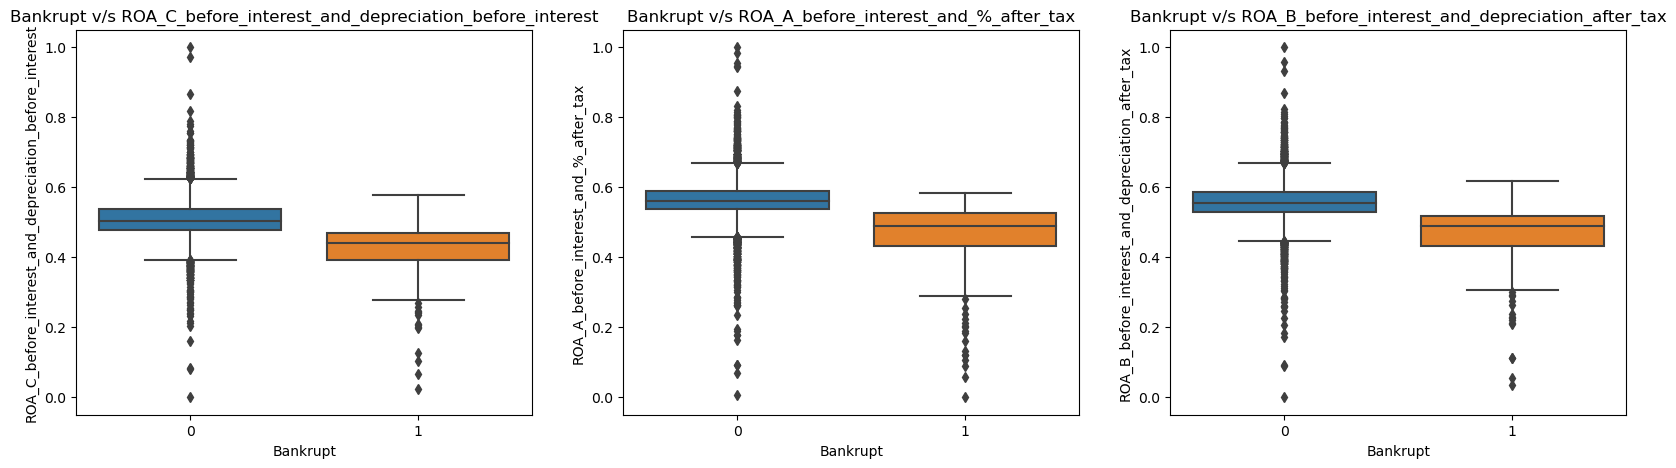

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(x="Bankrupt", y="ROA_C_before_interest_and_depreciation_before_interest", data = company_df)
plt.title("Bankrupt v/s ROA_C_before_interest_and_depreciation_before_interest")

plt.subplot(1,3,2)
sns.boxplot(x="Bankrupt", y="ROA_A_before_interest_and_%_after_tax", data = company_df)
plt.title("Bankrupt v/s ROA_A_before_interest_and_%_after_tax")

plt.subplot(1,3,3)
sns.boxplot(x="Bankrupt", y="ROA_B_before_interest_and_depreciation_after_tax", data = company_df)
plt.title("Bankrupt v/s ROA_B_before_interest_and_depreciation_after_tax")


plt.show()

#### Insights
- The ROA_C_before_interest_and_depreciation_before_interest should be higher to avoid Bankruptcy.
- The ROA_A_before_interest_and_%_after_tax should be higher to avoid Bankruptcy.
- The ROA_B_before_interest_and_depreciation_after_tax should be higher to avoid Bankruptcy.

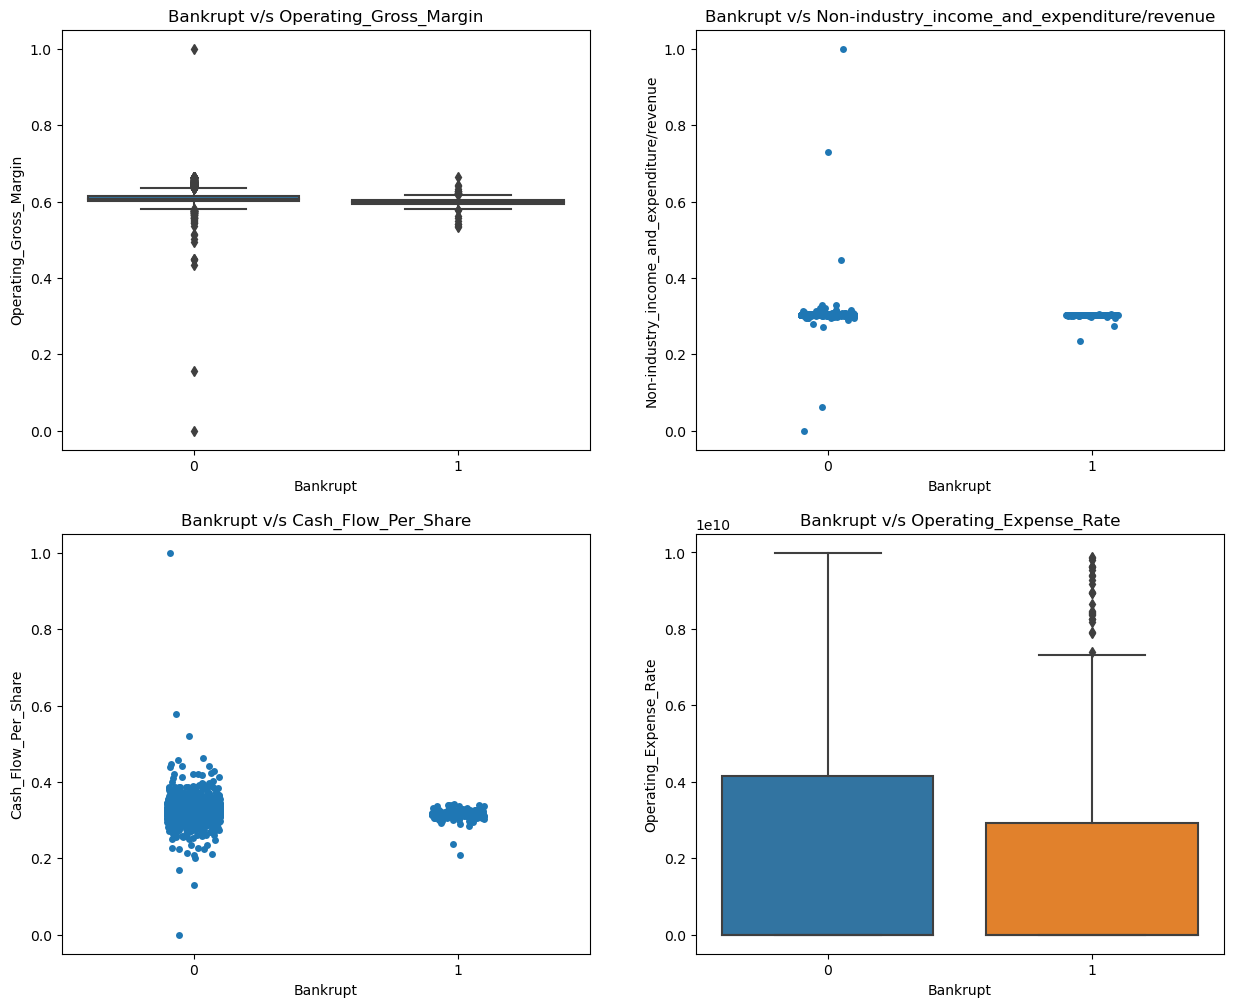

In [14]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.boxplot(x="Bankrupt", y="Operating_Gross_Margin", data = company_df)
plt.title("Bankrupt v/s Operating_Gross_Margin")

plt.subplot(2,2,2)
sns.stripplot(x="Bankrupt", y="Non-industry_income_and_expenditure/revenue", data = company_df)
plt.title("Bankrupt v/s Non-industry_income_and_expenditure/revenue")

plt.subplot(2,2,3)
sns.stripplot(x="Bankrupt", y="Cash_Flow_Per_Share", data = company_df)
plt.title("Bankrupt v/s Cash_Flow_Per_Share")

plt.subplot(2,2,4)
sns.boxplot(x="Bankrupt", y="Operating_Expense_Rate", data = company_df)
plt.title("Bankrupt v/s Operating_Expense_Rate")

plt.show()

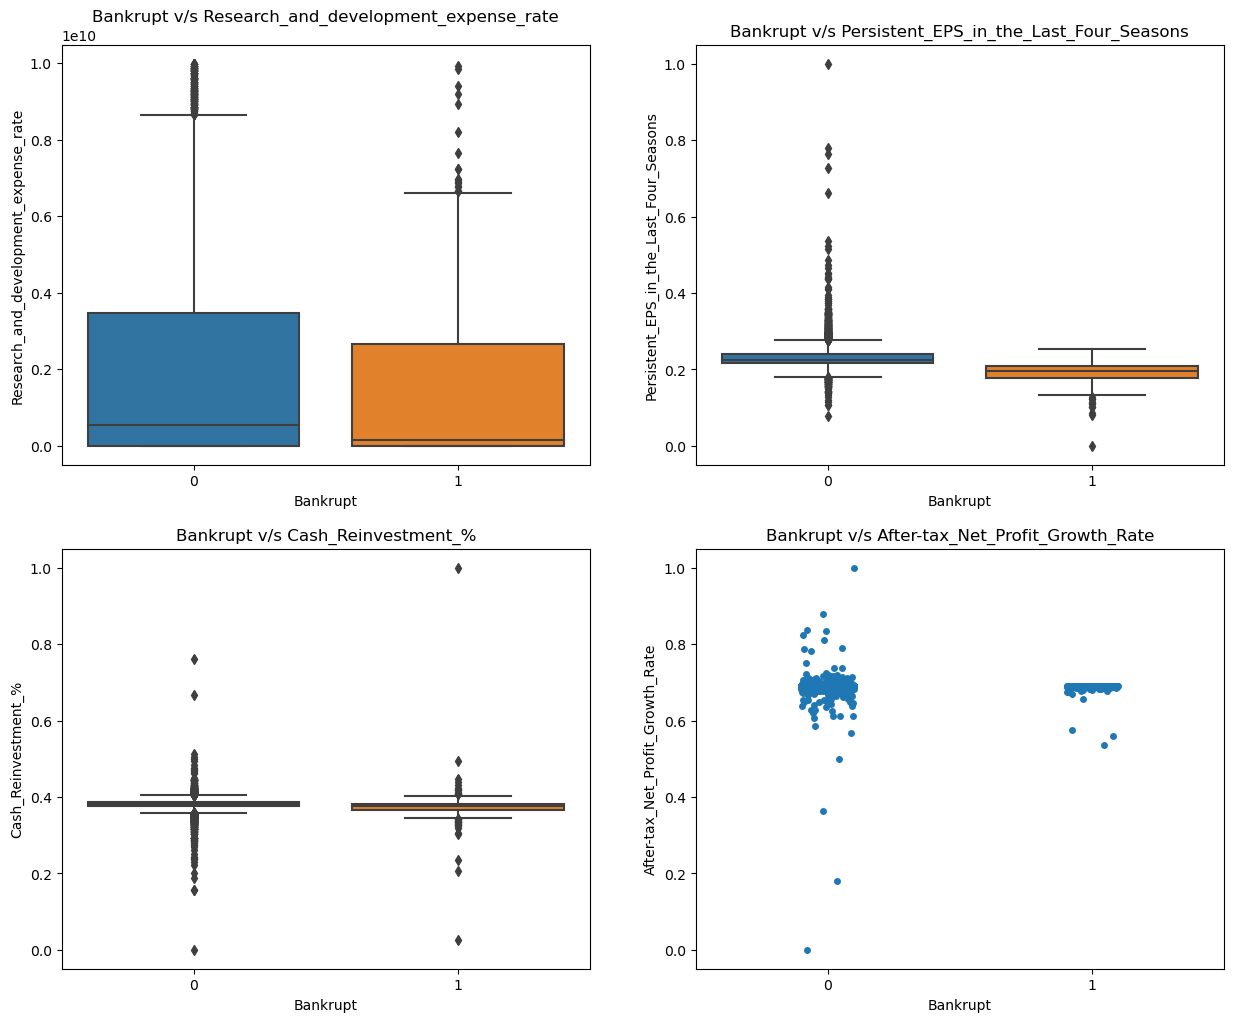

In [15]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.boxplot(x="Bankrupt", y="Research_and_development_expense_rate", data = company_df)
plt.title("Bankrupt v/s Research_and_development_expense_rate")

plt.subplot(2,2,2)
sns.boxplot(x="Bankrupt", y="Persistent_EPS_in_the_Last_Four_Seasons", data = company_df)
plt.title("Bankrupt v/s Persistent_EPS_in_the_Last_Four_Seasons")

plt.subplot(2,2,3)
sns.boxplot(x="Bankrupt", y="Cash_Reinvestment_%", data = company_df)
plt.title("Bankrupt v/s Cash_Reinvestment_%")

plt.subplot(2,2,4)
sns.stripplot(x="Bankrupt", y="After-tax_Net_Profit_Growth_Rate", data = company_df)
plt.title("Bankrupt v/s After-tax_Net_Profit_Growth_Rate")

plt.show()

#### Insights
- If the Research_and_development_expense_rate is on the higher side then a company has less chance of Bankrupcy.
- If the Persistent_EPS_in_the_Last_Four_Seasons is on the higher side then a company has less chance of Bankrupcy.

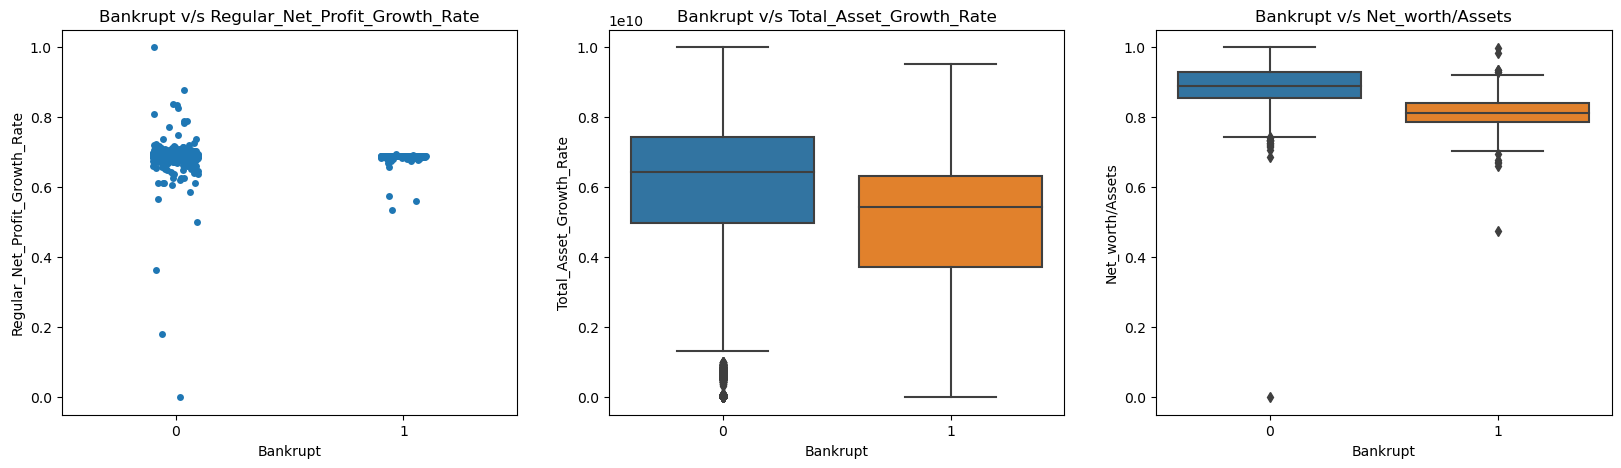

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.stripplot(x="Bankrupt", y="Regular_Net_Profit_Growth_Rate", data = company_df)
plt.title("Bankrupt v/s Regular_Net_Profit_Growth_Rate")

plt.subplot(1,3,2)
sns.boxplot(x="Bankrupt", y="Total_Asset_Growth_Rate", data = company_df)
plt.title("Bankrupt v/s Total_Asset_Growth_Rate")

plt.subplot(1,3,3)
sns.boxplot(x="Bankrupt", y="Net_worth/Assets", data = company_df)
plt.title("Bankrupt v/s Net_worth/Assets")

plt.show()

#### Insights
- The companies who have Total_Asset_Growth_Rate is on the higher side then it has a less chance of Bankrupcy.
- The companies having Net_worth/Assets rate more i.e above 0.9 then a company has less chance of Bankrupcy.

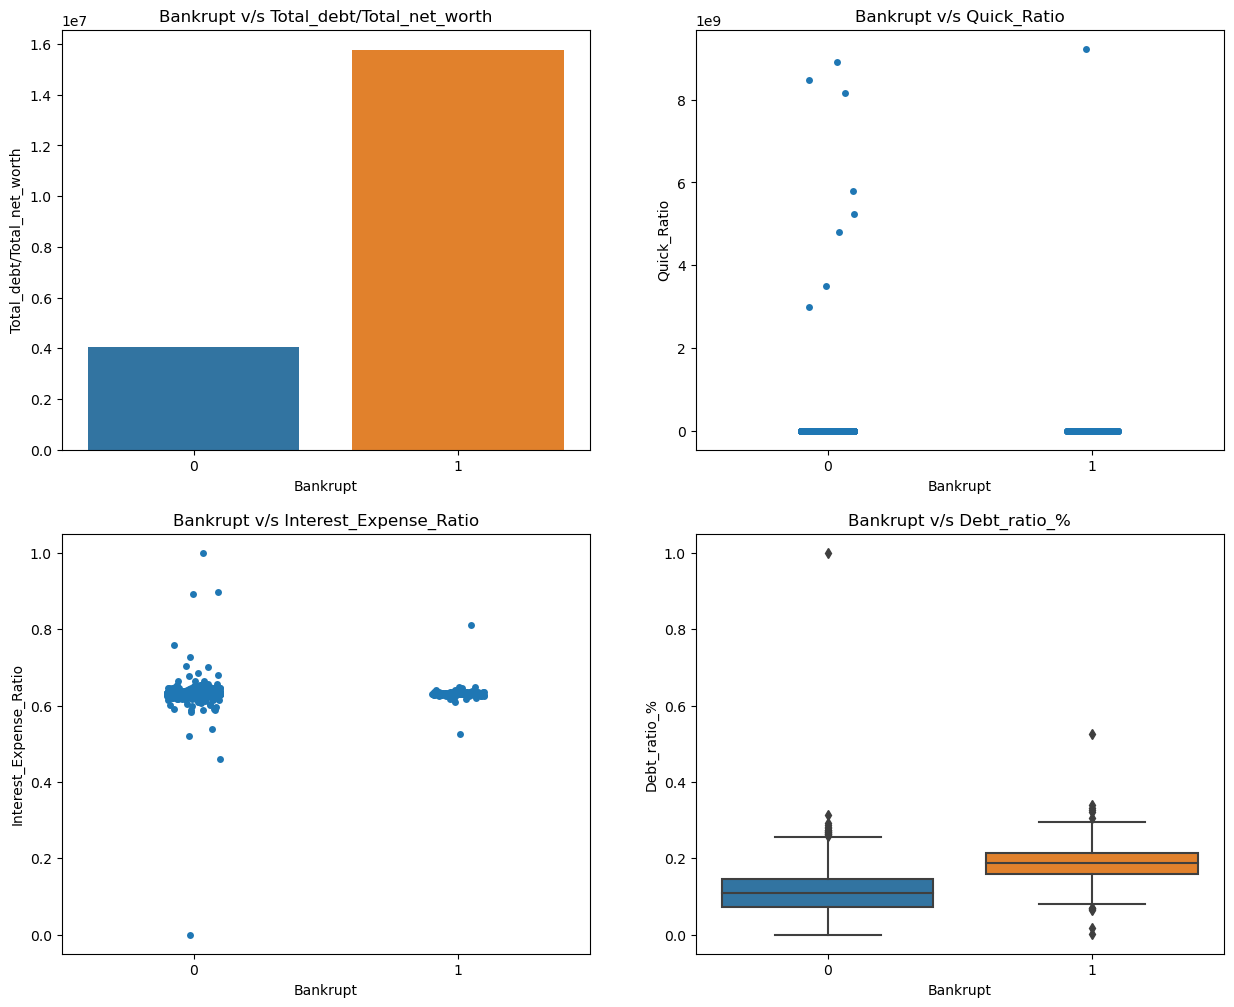

In [17]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.barplot(x="Bankrupt", y="Total_debt/Total_net_worth", data = company_df,errorbar=None)
plt.title("Bankrupt v/s Total_debt/Total_net_worth")

plt.subplot(2,2,2)
sns.stripplot(x="Bankrupt", y="Quick_Ratio", data = company_df)
plt.title("Bankrupt v/s Quick_Ratio")

plt.subplot(2,2,3)
sns.stripplot(x="Bankrupt", y="Interest_Expense_Ratio", data = company_df)
plt.title("Bankrupt v/s Interest_Expense_Ratio")

plt.subplot(2,2,4)
sns.boxplot(x="Bankrupt", y="Debt_ratio_%", data = company_df)
plt.title("Bankrupt v/s Debt_ratio_%")

plt.show()

#### Insights
- The companies having lesser Total_debt/Total_net_worth ratio, are stable and have less chances of bankrupcy. 
- The companies having higher Quick_Ratio, are stable and have less chances of bankrupcy.
- The companies having lesser Debt_ratio_%, are stable and have less chances of bankrupcy.

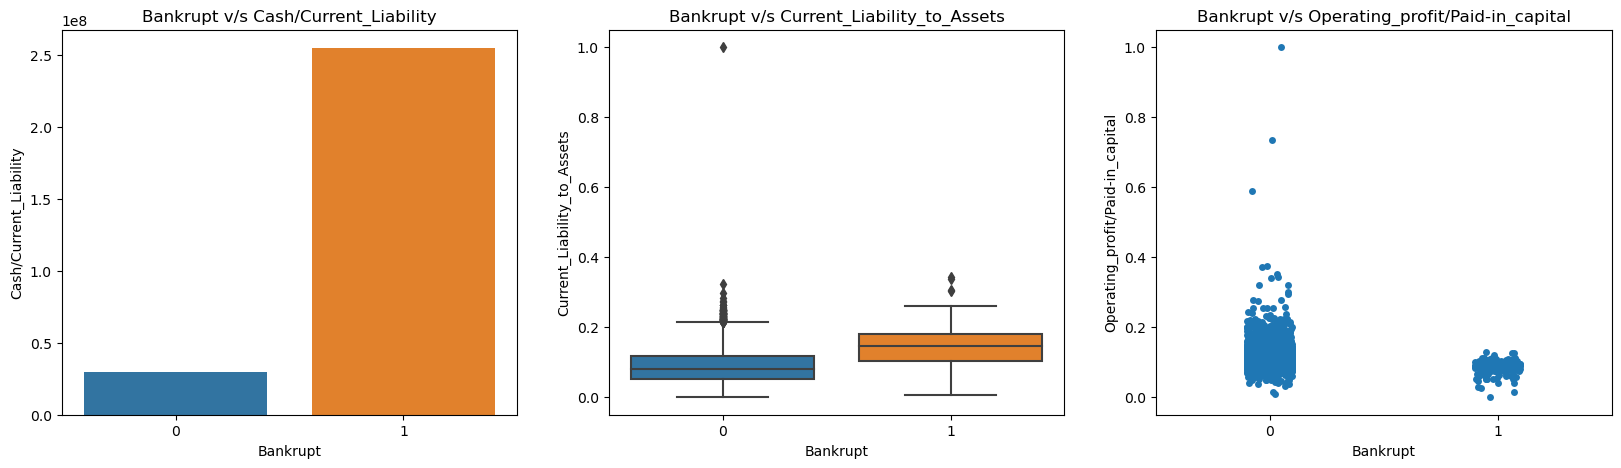

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(x="Bankrupt", y="Cash/Current_Liability", data = company_df,errorbar=None)
plt.title("Bankrupt v/s Cash/Current_Liability")

plt.subplot(1,3,2)
sns.boxplot(x="Bankrupt", y="Current_Liability_to_Assets", data = company_df)
plt.title("Bankrupt v/s Current_Liability_to_Assets")

plt.subplot(1,3,3)
sns.stripplot(x="Bankrupt", y="Operating_profit/Paid-in_capital", data = company_df)
plt.title("Bankrupt v/s Operating_profit/Paid-in_capital")

plt.show()

#### Insights
- The companies having more Cash/Current_Liability ratio, have chances of bankrupcy. 
- The companies having lesser Current_Liability_to_Assets, are stable and have less chances of bankrupcy.
- The companies having lesser Operating_profit/Paid-in_capital, are likely to be bankcrupt.

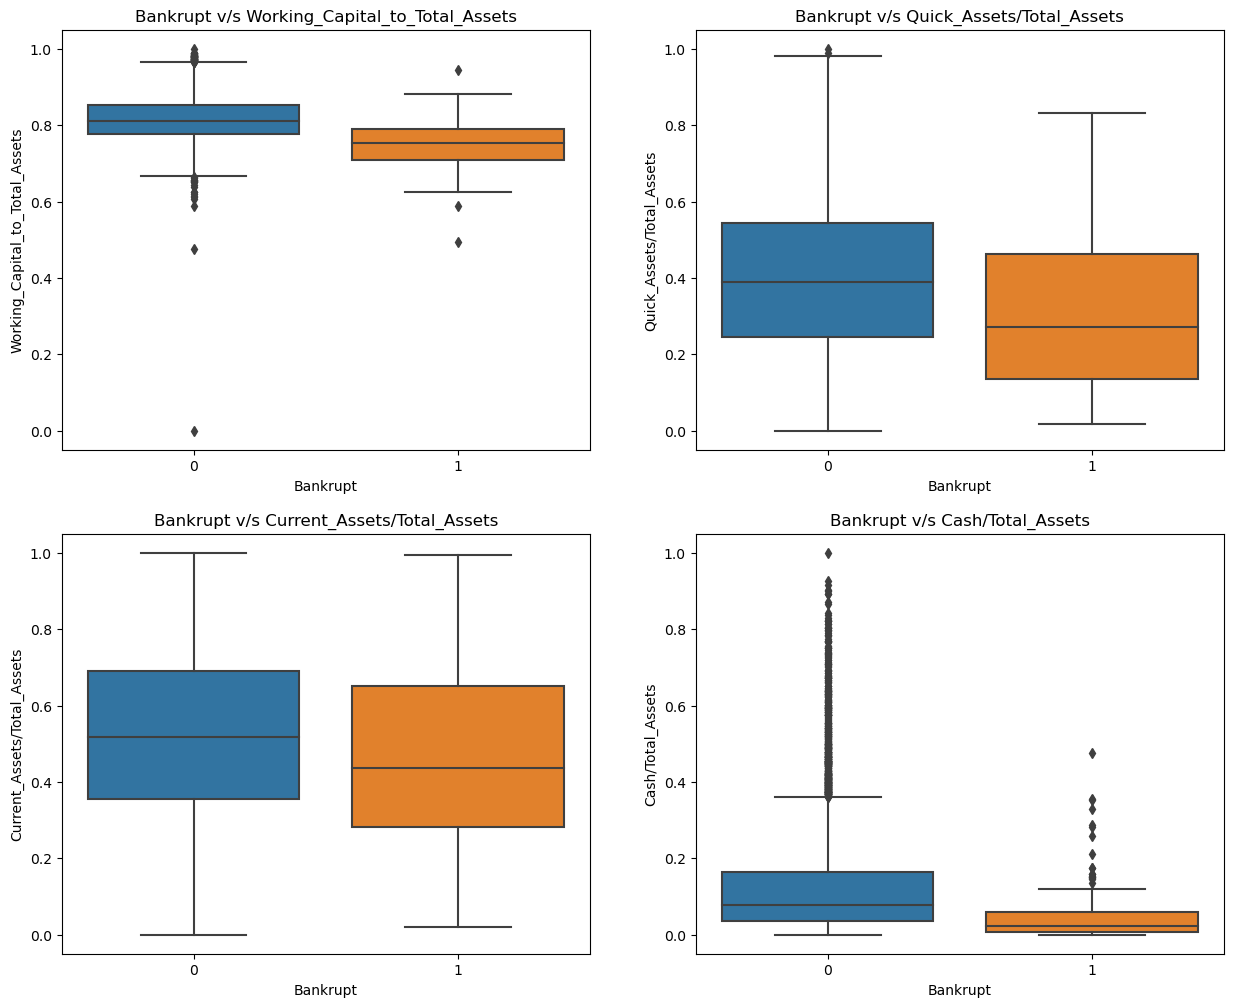

In [19]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.boxplot(x="Bankrupt", y="Working_Capital_to_Total_Assets", data = company_df)
plt.title("Bankrupt v/s Working_Capital_to_Total_Assets")

plt.subplot(2,2,2)
sns.boxplot(x="Bankrupt", y="Quick_Assets/Total_Assets", data = company_df)
plt.title("Bankrupt v/s Quick_Assets/Total_Assets")

plt.subplot(2,2,3)
sns.boxplot(x="Bankrupt", y="Current_Assets/Total_Assets", data = company_df)
plt.title("Bankrupt v/s Current_Assets/Total_Assets")

plt.subplot(2,2,4)
sns.boxplot(x="Bankrupt", y="Cash/Total_Assets", data = company_df)
plt.title("Bankrupt v/s Cash/Total_Assets")

plt.show()

#### Insights
- If the Working_Capital_to_Total_Assets is higher then a company has less chance of Bankrupcy.
- If the Quick_Assets/Total_Assets is above 0.4 then a company has less chance of Bankrupcy.
- If the Current_Assets/Total_Assets is above 0.5 then a company has less chance of Bankrupcy.
- If the Cash/Total_Assets is above 0.1 then a company has less chance of Bankrupcy.

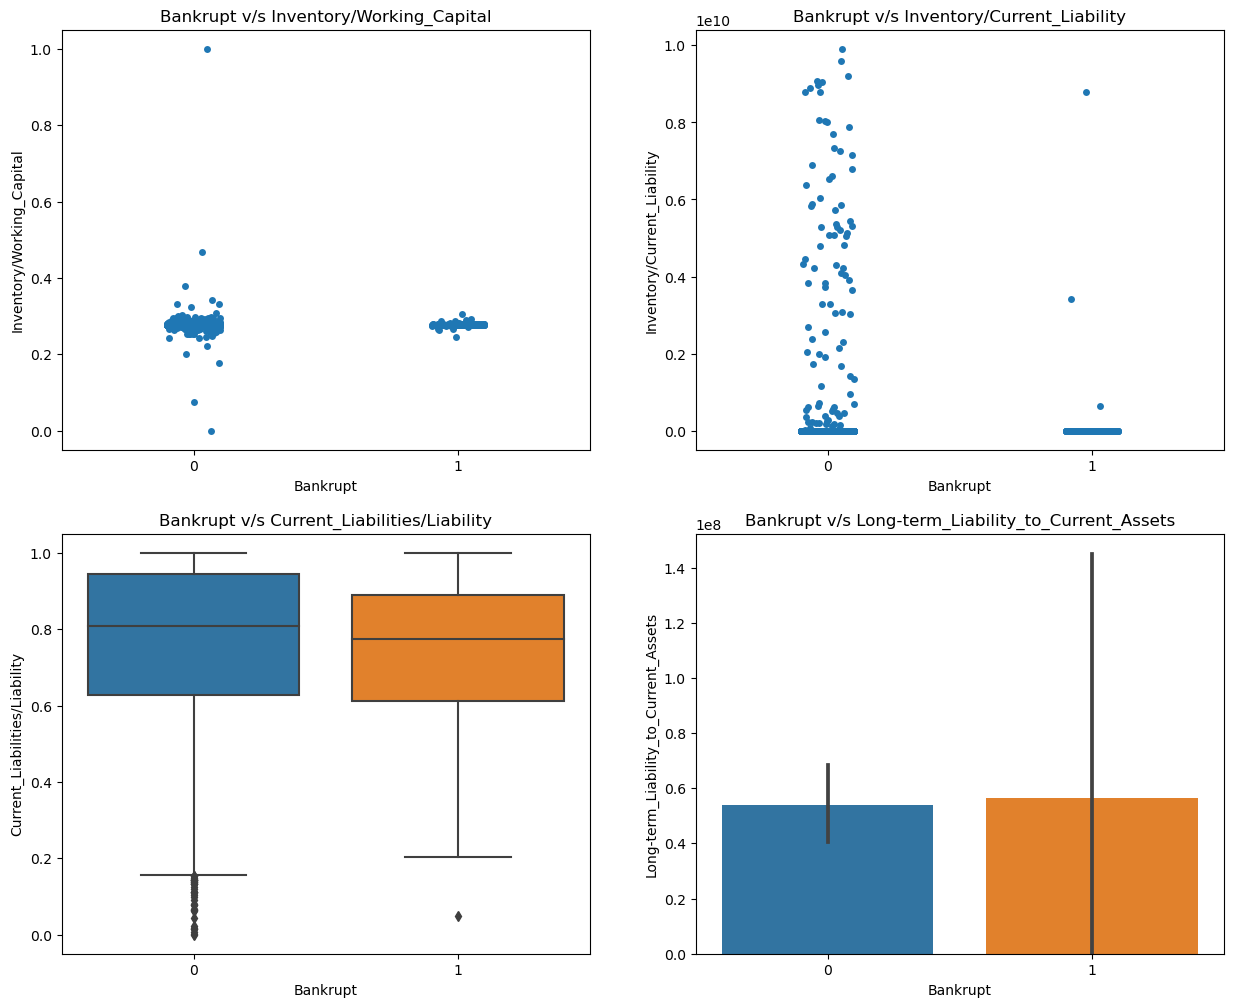

In [20]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.stripplot(x="Bankrupt", y="Inventory/Working_Capital", data = company_df)
plt.title("Bankrupt v/s Inventory/Working_Capital")

plt.subplot(2,2,2)
sns.stripplot(x="Bankrupt", y="Inventory/Current_Liability", data = company_df)
plt.title("Bankrupt v/s Inventory/Current_Liability")

plt.subplot(2,2,3)
sns.boxplot(x="Bankrupt", y="Current_Liabilities/Liability", data = company_df)
plt.title("Bankrupt v/s Current_Liabilities/Liability")

plt.subplot(2,2,4)
sns.barplot(x="Bankrupt", y="Long-term_Liability_to_Current_Assets", data = company_df)
plt.title("Bankrupt v/s Long-term_Liability_to_Current_Assets")

plt.show()

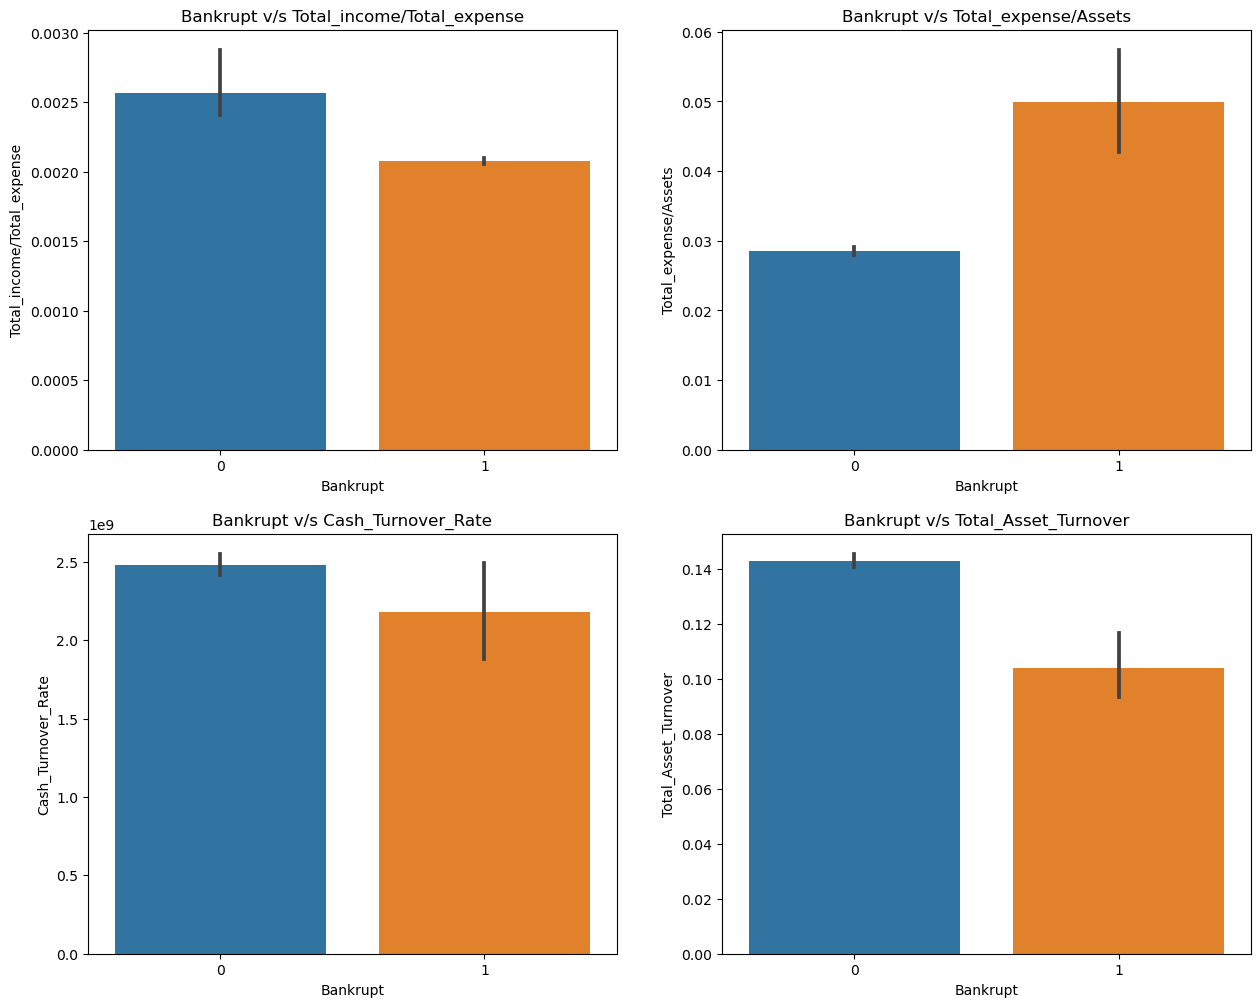

In [21]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.barplot(x="Bankrupt", y="Total_income/Total_expense", data = company_df)
plt.title("Bankrupt v/s Total_income/Total_expense")

plt.subplot(2,2,2)
sns.barplot(x="Bankrupt", y="Total_expense/Assets", data = company_df)
plt.title("Bankrupt v/s Total_expense/Assets")

plt.subplot(2,2,3)
sns.barplot(x="Bankrupt", y="Cash_Turnover_Rate", data = company_df)
plt.title("Bankrupt v/s Cash_Turnover_Rate")

plt.subplot(2,2,4)
sns.barplot(x="Bankrupt", y="Total_Asset_Turnover", data = company_df)
plt.title("Bankrupt v/s Total_Asset_Turnover")

plt.show()

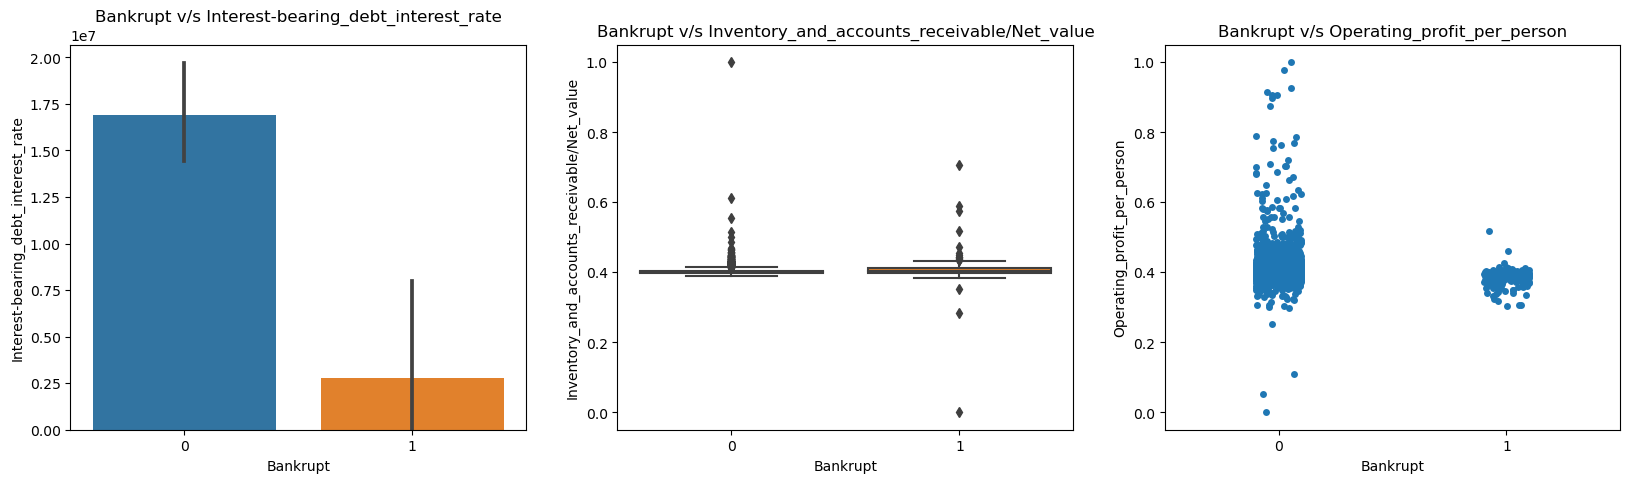

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(x="Bankrupt", y="Interest-bearing_debt_interest_rate", data = company_df)
plt.title("Bankrupt v/s Interest-bearing_debt_interest_rate")

plt.subplot(1,3,2)
sns.boxplot(x="Bankrupt", y="Inventory_and_accounts_receivable/Net_value", data = company_df)
plt.title("Bankrupt v/s Inventory_and_accounts_receivable/Net_value")

plt.subplot(1,3,3)
sns.stripplot(x="Bankrupt", y="Operating_profit_per_person", data = company_df)
plt.title("Bankrupt v/s Operating_profit_per_person")


plt.show()

#### Insights
- The company having less Interest-bearing_debt_interest_rate are prone to Bankrupcy.
- The company having higher Operating_profit_per_person have less likely to Bankcrupt.

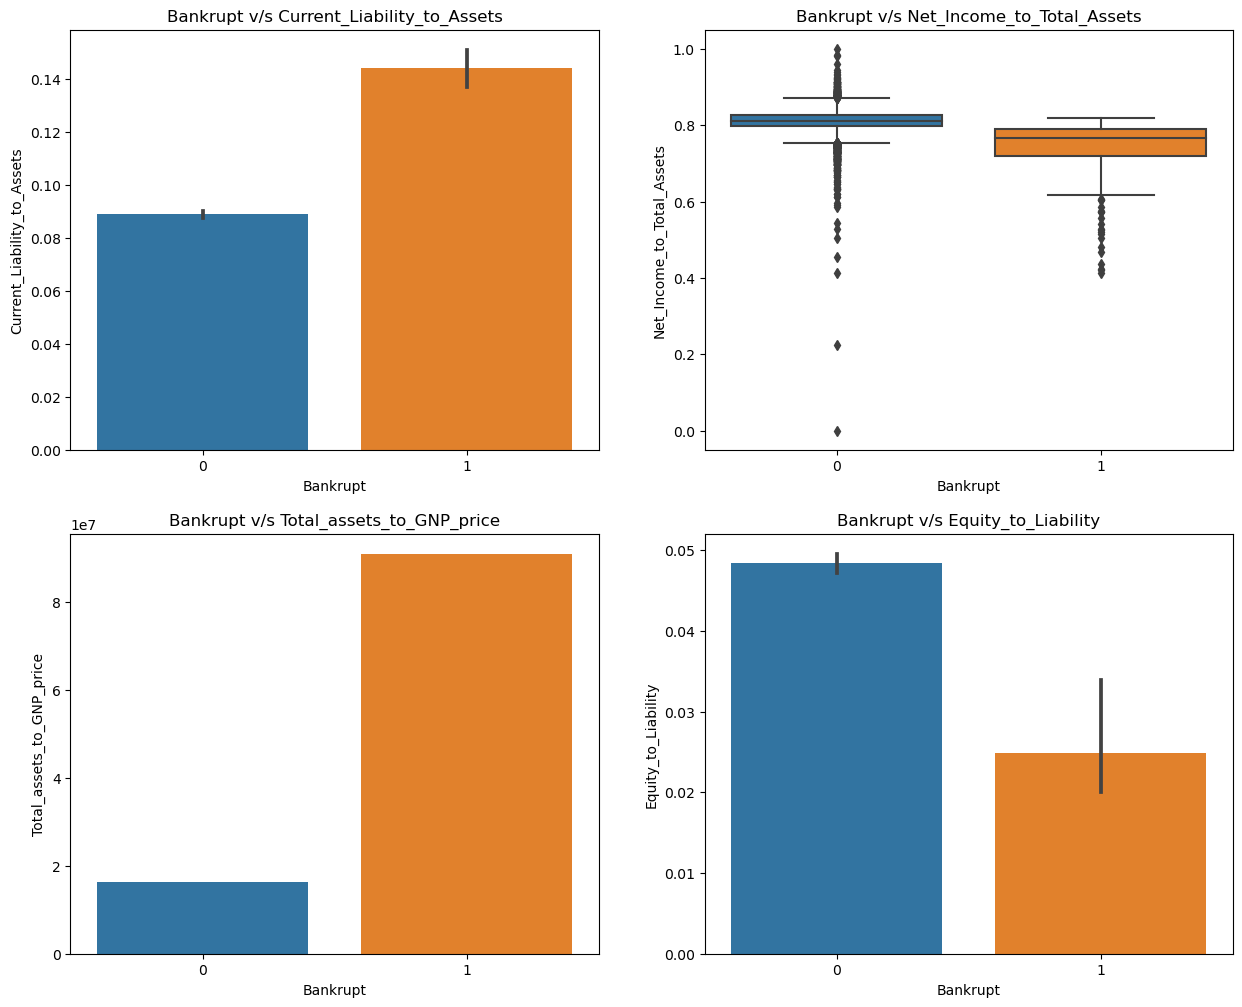

In [23]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.barplot(x="Bankrupt", y="Current_Liability_to_Assets", data = company_df)
plt.title("Bankrupt v/s Current_Liability_to_Assets")

plt.subplot(2,2,2)
sns.boxplot(x="Bankrupt", y="Net_Income_to_Total_Assets", data = company_df)
plt.title("Bankrupt v/s Net_Income_to_Total_Assets")

plt.subplot(2,2,3)
sns.barplot(x="Bankrupt", y="Total_assets_to_GNP_price", data = company_df,errorbar=None)
plt.title("Bankrupt v/s Total_assets_to_GNP_price")

plt.subplot(2,2,4)
sns.barplot(x="Bankrupt", y="Equity_to_Liability", data = company_df)
plt.title("Bankrupt v/s Equity_to_Liability")

plt.show()

#### Insights
- The company having less Current_Liability_to_Assets ratio are less likely to Bankrupcy.
- The company having higher Net_Income_to_Total_Assets are less likely to Bankcrupt.
- The company having lower Total_assets_to_GNP_price are less likely to Bankcrupt.
- The company having higher Equity_to_Liability are less likely to Bankcrupt.

### Dropping the Similar features

In [24]:
company_df[["Current_Liabilities/Liability","Current_Liability_to_Liability","Current_Liability_to_Equity","Current_Liabilities/Equity"]]

,Current_Liabilities/Liability,Current_Liability_to_Liability,Current_Liability_to_Equity,Current_Liabilities/Equity
0,0.676269,0.676269,0.339077,0.339077
1,0.308589,0.308589,0.329740,0.329740
2,0.446027,0.446027,0.334777,0.334777
3,0.615848,0.615848,0.331509,0.331509
4,0.975007,0.975007,0.330726,0.330726
...,...,...,...,...
6814,0.786888,0.786888,0.330914,0.330914
6815,0.849898,0.849898,0.329753,0.329753
6816,0.553964,0.553964,0.326921,0.326921
6817,0.893241,0.893241,0.329294,0.329294


In [25]:
company_df=company_df.drop(['Current_Liability_to_Liability','Current_Liability_to_Equity'],axis=1)

### Correlation Check

In [26]:
corr_mat= company_df.corr()

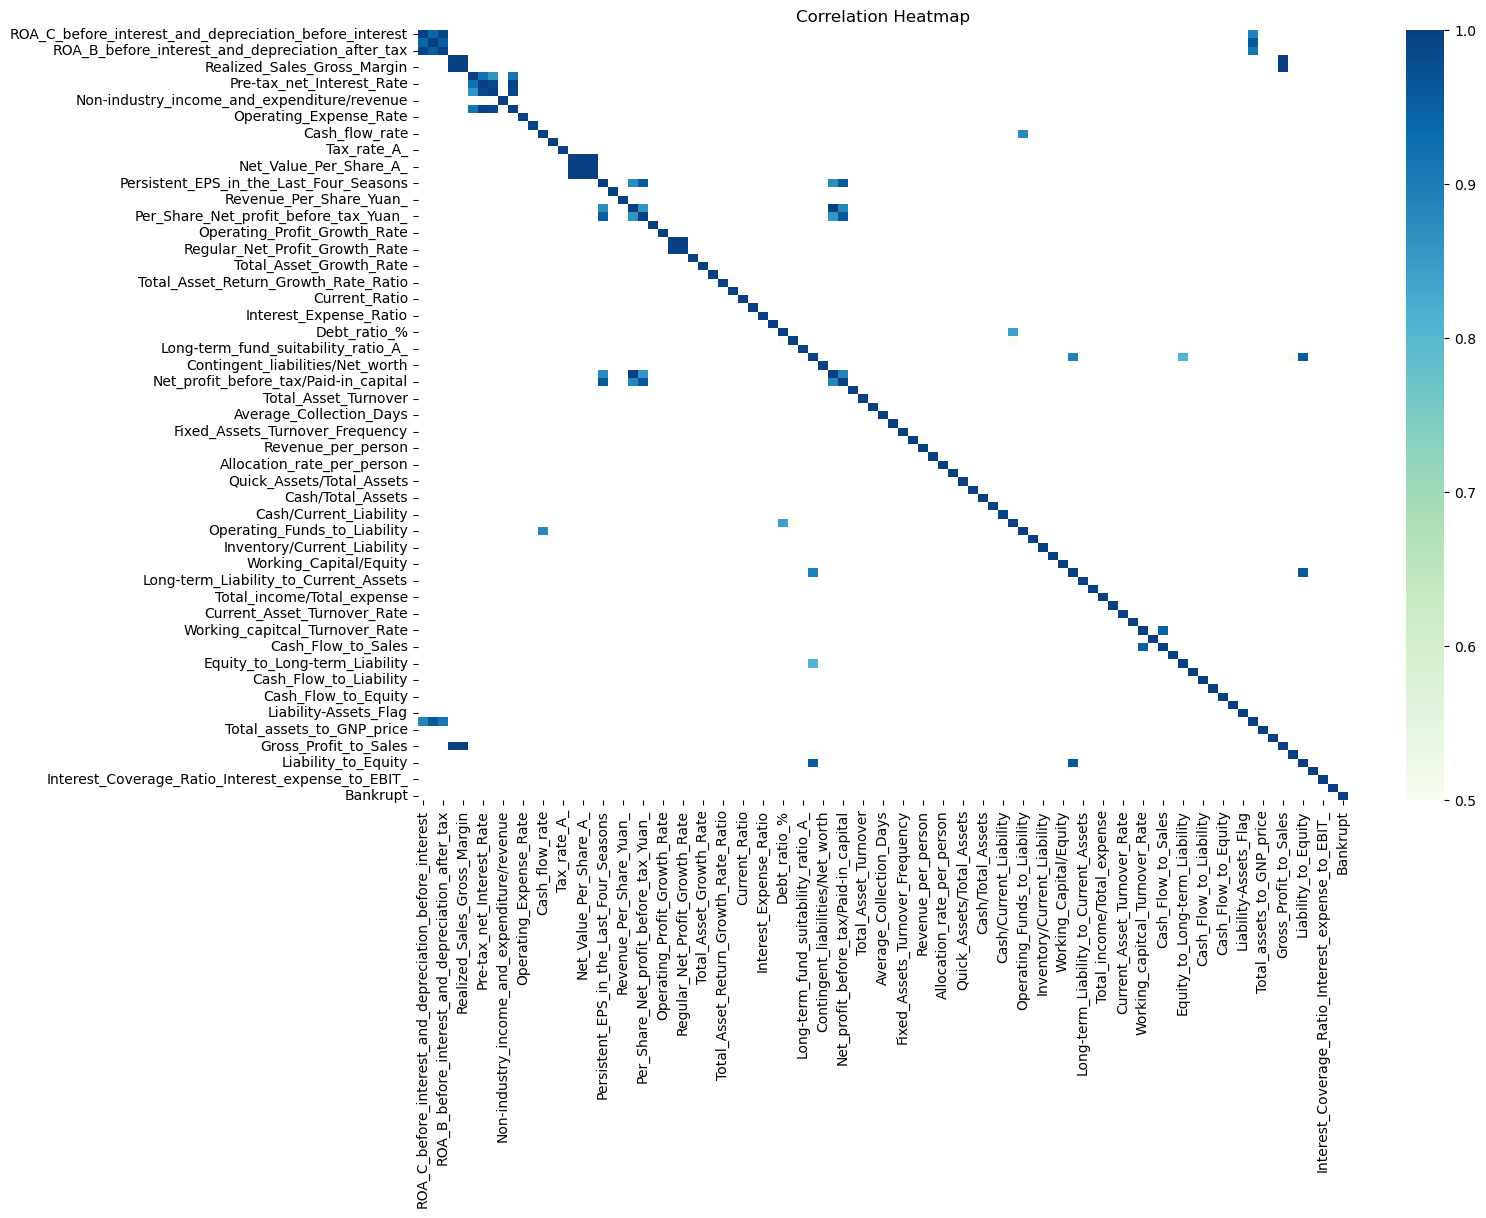

In [27]:
# Select correlations greater than 0.80
high_corr_mat = corr_mat[abs(corr_mat) >= 0.80]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

### Fetching the names of Highly correlated columns from the above matrix

In [28]:
corr_col=set()
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs((corr_mat.iloc[i,j])>0.85):    # Fetching the columns which have correlation of 85% and above.
            column_name=corr_mat.columns[i]
            corr_col.add(column_name)
print(corr_col)

{'Current_Liabilities/Equity', 'ROA_A_before_interest_and_%_after_tax', 'Realized_Sales_Gross_Margin', 'Operating_Profit_Per_Share_Yuan_', 'After-tax_net_Interest_Rate', 'Net_Income_to_Total_Assets', 'Net_Value_Per_Share_A_', 'Continuous_interest_rate_after_tax_', 'Pre-tax_net_Interest_Rate', 'Net_profit_before_tax/Paid-in_capital', 'Liability_to_Equity', 'Per_Share_Net_profit_before_tax_Yuan_', 'Net_Value_Per_Share_C_', 'Cash_Flow_to_Sales', 'Operating_profit/Paid-in_capital', 'Gross_Profit_to_Sales', 'Operating_Funds_to_Liability', 'Regular_Net_Profit_Growth_Rate', 'ROA_B_before_interest_and_depreciation_after_tax'}


### Finding the amount of outliers in each column

In [29]:
x = company_df.drop("Bankrupt", axis=1)
y = company_df[["Bankrupt"]]

In [30]:
def chk_outliers(data):
    outlier_list =[]
    percent_list=[]
    for i in data.columns:
            Q1 = data[i].quantile(0.25)
            Q3 = data[i].quantile(0.75)
            IQR = Q3 - Q1
            UL = Q3 + (1.5*IQR)
            LL = Q1 - (1.5*IQR)
            outlier_list.append(data[(data[i]> UL) | (data[i] <LL)].shape[0])
            percent_list.append(round(data[(data[i]> UL) | (data[i] <LL)].shape[0]/len(data)*100,2))
    outlier_df=pd.DataFrame({"Features":data.columns, "Outlier_amt":outlier_list, "Outlier_%":percent_list })
    outlier_df= outlier_df.sort_values("Outlier_amt", ascending = False)
    return outlier_df

In [31]:
outlier_df=chk_outliers(x)

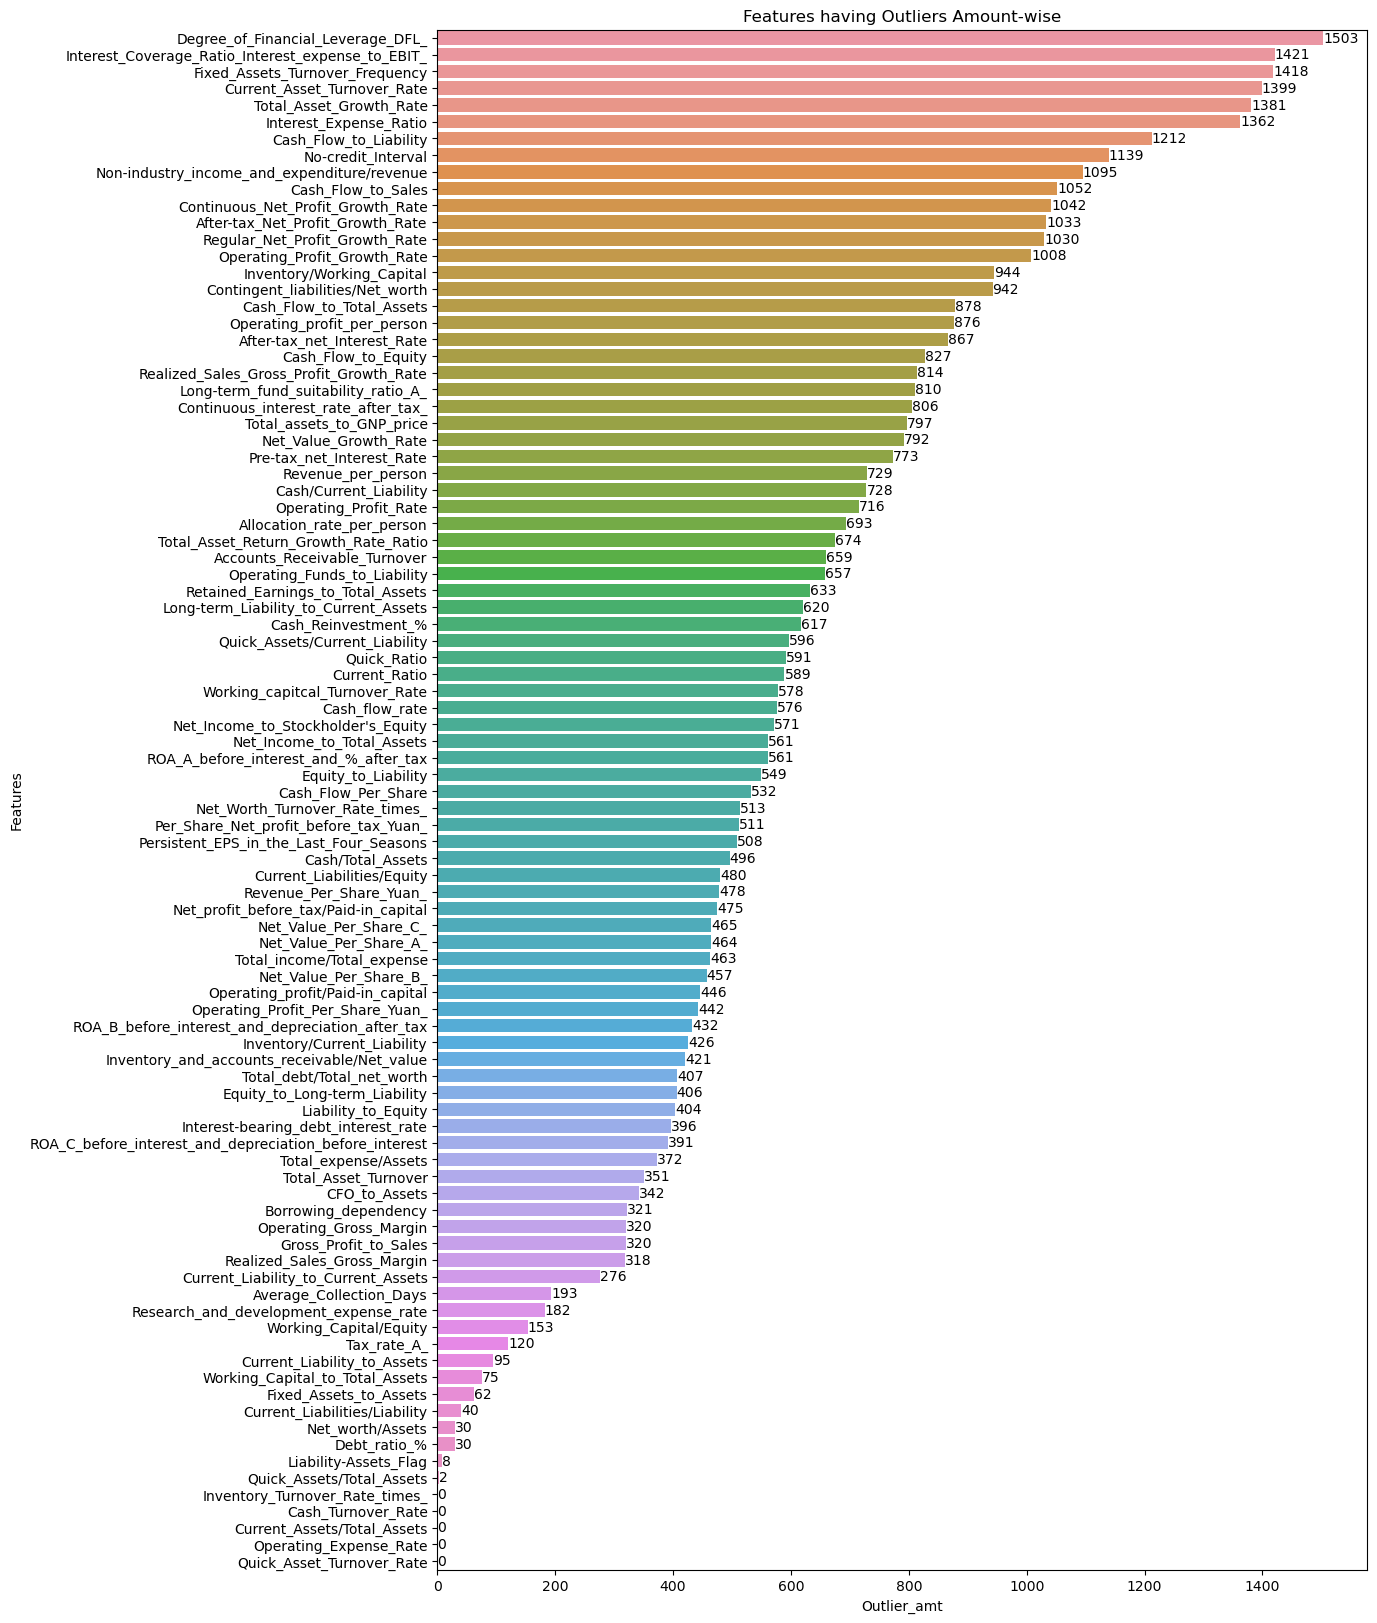

In [32]:
plt.figure(figsize=(12,20))
fig=sns.barplot(x='Outlier_amt',y ="Features", data= outlier_df)
fig.bar_label(fig.containers[0])
plt.title("Features having Outliers Amount-wise")
plt.show()

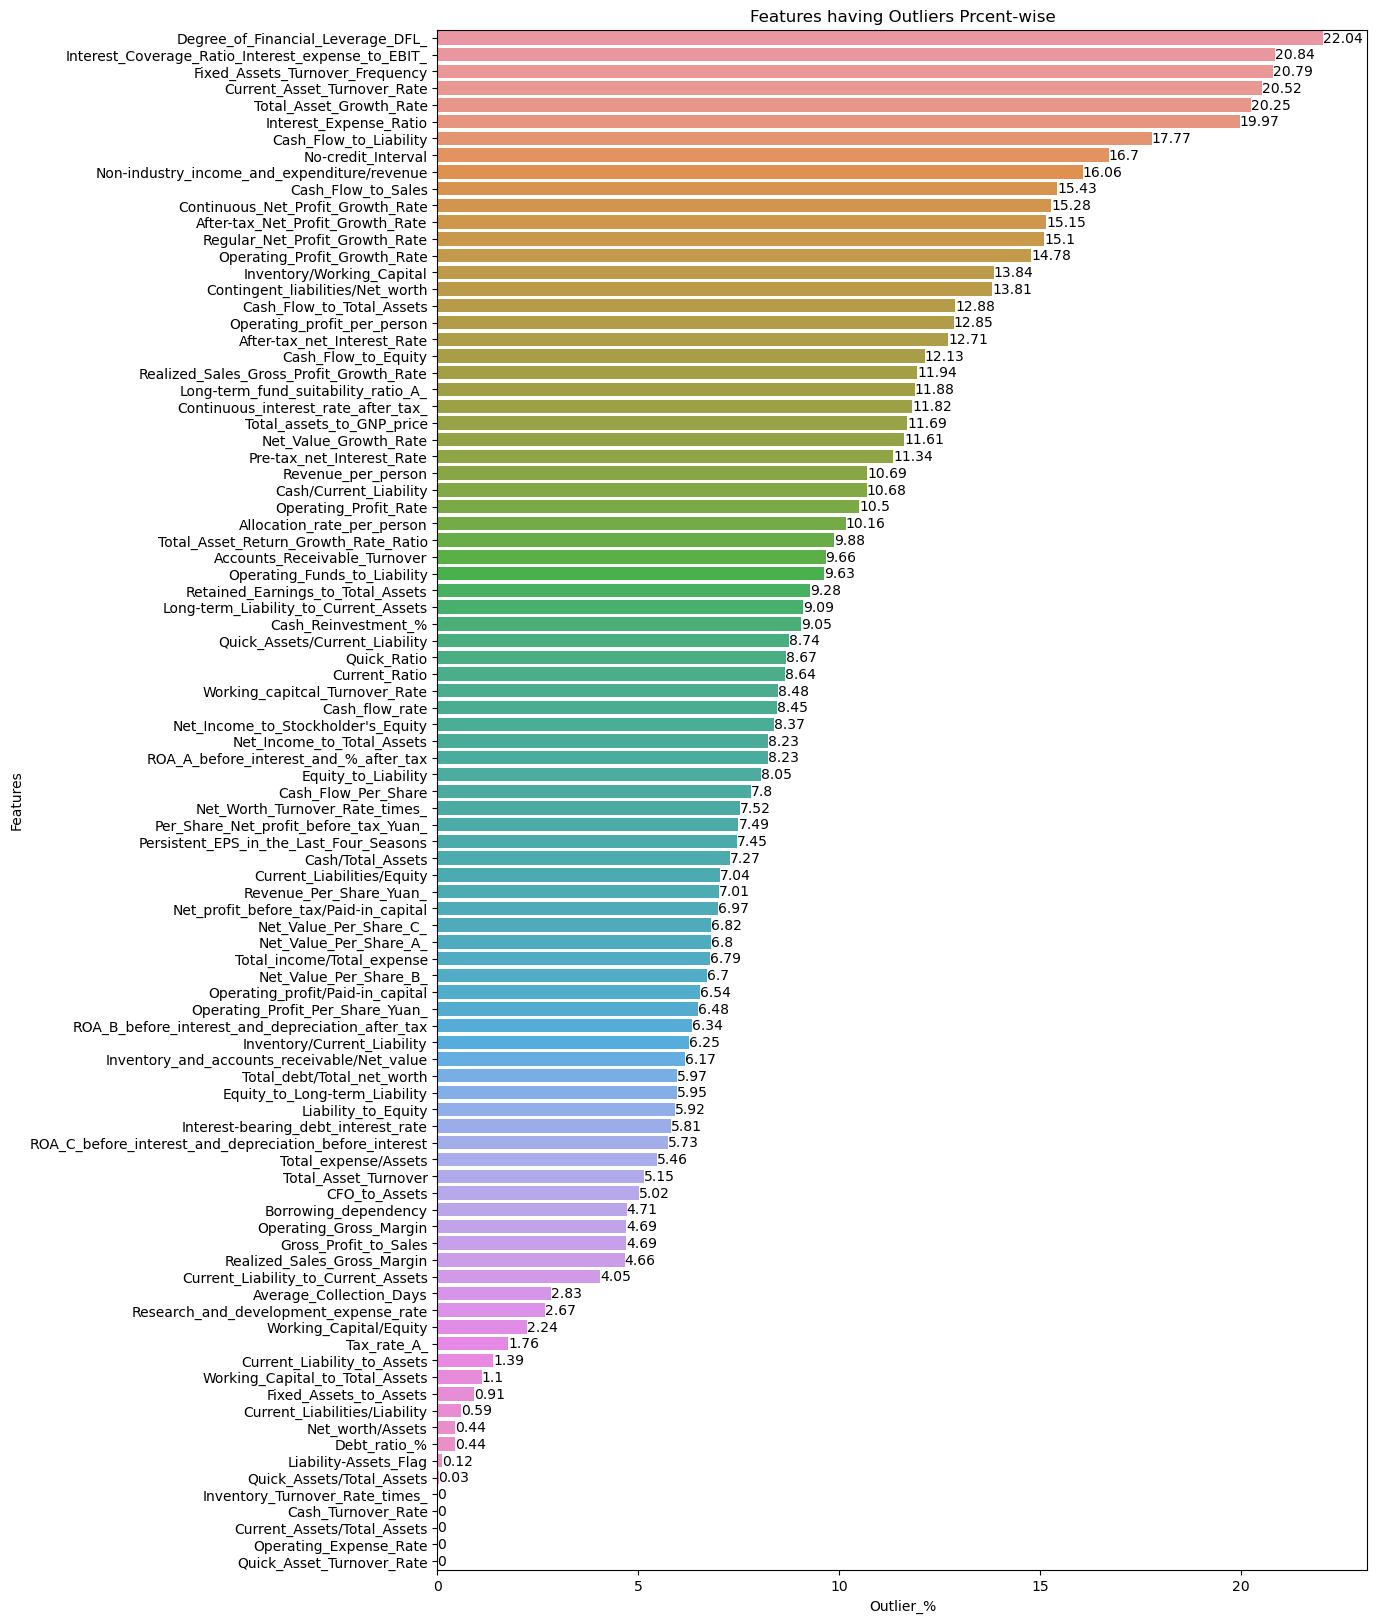

In [33]:
plt.figure(figsize=(12,20))
fig=sns.barplot(x='Outlier_%',y ="Features", data= outlier_df)
fig.bar_label(fig.containers[0])
plt.title("Features having Outliers Prcent-wise")
plt.show()

### Treating the Outliers

In [34]:
def outlier_removal(data):
    for i in data.columns:
        if i == "Bankrupt":
            continue
        else:
            Q1 = data[i].quantile(0.25)
            Q3 = data[i].quantile(0.75)
            IQR = Q3-Q1
            UL = Q3 + (IQR*1.5)
            LL = Q1 - (IQR*1.5)
            for j in range(len(data)):
                if data[i][j]>UL:
                    data[i][j] =UL
                if data[i][j]<LL:
                    data[i][j]=LL

In [35]:
x_treated = x.copy()
outlier_removal(x_treated)

In [36]:
chk_outliers(x_treated)

,Features,Outlier_amt,Outlier_%
0,ROA_C_before_interest_and_depreciation_before_...,0,0.0
58,Cash/Current_Liability,0,0.0
67,Retained_Earnings_to_Total_Assets,0,0.0
66,Long-term_Liability_to_Current_Assets,0,0.0
65,Current_Liabilities/Equity,0,0.0
...,...,...,...
28,Total_Asset_Growth_Rate,0,0.0
27,Continuous_Net_Profit_Growth_Rate,0,0.0
26,Regular_Net_Profit_Growth_Rate,0,0.0
25,After-tax_Net_Profit_Growth_Rate,0,0.0


### Spliting the data

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, roc_curve, classification_report, confusion_matrix

In [38]:
print(x.shape)
print(y.shape)

(6819, 92)
(6819, 1)


In [39]:
x_drop_correlated = x_treated.drop(['After-tax_net_Interest_Rate', 'Cash_Flow_to_Sales', 'Operating_profit/Paid-in_capital',
                                    'Continuous_interest_rate_after_tax_', 'Net_Income_to_Total_Assets',
                                    'Per_Share_Net_profit_before_tax_Yuan_', 'Gross_Profit_to_Sales',
                                    'Pre-tax_net_Interest_Rate', 'Net_Value_Per_Share_C_',
                                    'Net_profit_before_tax/Paid-in_capital', 'Operating_Profit_Per_Share_Yuan_',
                                    'Net_Value_Per_Share_A_','ROA_A_before_interest_and_%_after_tax',
                                    'Current_Liabilities/Equity', 'ROA_B_before_interest_and_depreciation_after_tax',
                                    'Regular_Net_Profit_Growth_Rate', 'Realized_Sales_Gross_Margin',
                                    'Operating_Funds_to_Liability', 'Liability_to_Equity'], axis=1)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_drop_correlated,y, test_size=0.25,random_state=53,
                                                                    stratify=y)

In [41]:
print(x_train.shape)
print(y_train.shape)

(5114, 73)
(5114, 1)


In [42]:
y_train.value_counts()

Bankrupt
0           4949
1            165
dtype: int64

## Model Building using stratifying 

### 1) Decision Tree 

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
Dtree_gini = DecisionTreeClassifier()
tree_gini = Dtree_gini.fit(x_train,y_train)

y_pred_train_dt = tree_gini.predict(x_train)
y_pred_test_dt = tree_gini.predict(x_test)

print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_dt))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_dt))
print()
print("Training Report: \n",classification_report(y_train, y_pred_train_dt))
print("Testing Report: \n",classification_report(y_test, y_pred_test_dt))

Training Accuracy:  1.0
Testing Accuracy:  0.9478005865102639

Training Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4949
           1       1.00      1.00      1.00       165

    accuracy                           1.00      5114
   macro avg       1.00      1.00      1.00      5114
weighted avg       1.00      1.00      1.00      5114

Testing Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1650
           1       0.25      0.31      0.28        55

    accuracy                           0.95      1705
   macro avg       0.61      0.64      0.62      1705
weighted avg       0.95      0.95      0.95      1705



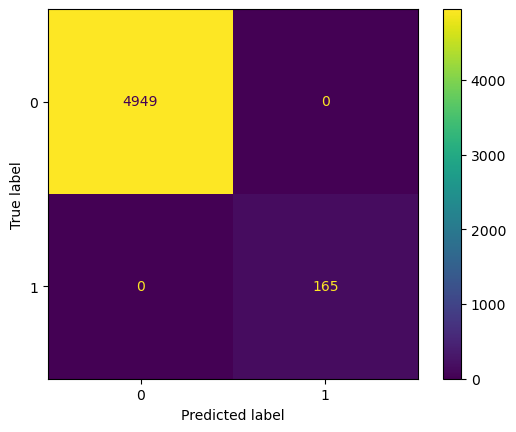

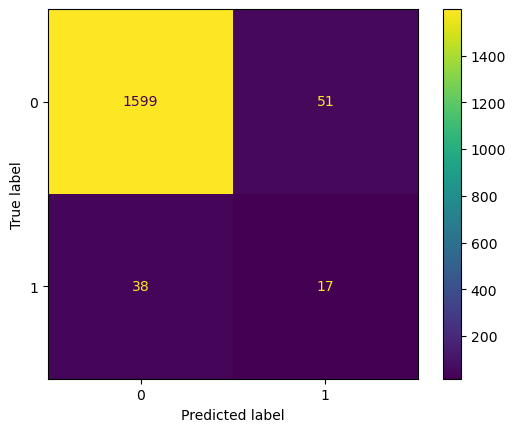

In [45]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_dt)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_dt)

### Hypertune the parameters using the Grid Search CV

In [46]:
parameters = {'criterion':["gini", "entropy"],
              'max_depth':[2,3,4],
              'min_samples_split':[100,200,300],
              'min_samples_leaf':[50,100,150],
             }

cv_dt = GridSearchCV(Dtree_gini,
                    param_grid=parameters,
                    cv=10,n_jobs=2)

cv_dt.fit(x_train, y_train)
print("Best Parameters:\n", cv_dt.best_params_)

Best Parameters:
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50, 'min_samples_split': 200}


### Using the Hypertuned Parameters:

In [47]:
Dtree_tuned = DecisionTreeClassifier(criterion='gini', 
                                     max_depth=2, 
                                     min_samples_leaf= 50, 
                                     min_samples_split= 200)

In [48]:
tree_tuned = Dtree_tuned.fit(x_train,y_train)

y_pred_train_dt_tuned = tree_tuned.predict(x_train)
y_pred_test_dt_tuned = tree_tuned.predict(x_test)

print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_dt_tuned))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_dt_tuned))
print()
print("Training Report: \n",classification_report(y_train, y_pred_train_dt_tuned))
print("Testing Report: \n",classification_report(y_test, y_pred_test_dt_tuned))

Training Accuracy:  0.9677356276886977
Testing Accuracy:  0.967741935483871

Training Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4949
           1       0.00      0.00      0.00       165

    accuracy                           0.97      5114
   macro avg       0.48      0.50      0.49      5114
weighted avg       0.94      0.97      0.95      5114

Testing Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705



### 2) Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [50]:
rf = model_rf.fit(x_train, y_train)
y_pred_training = rf.predict(x_train)
y_pred_testing =rf.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing))
print()
print(classification_report(y_train,y_pred_training))
print(classification_report(y_test,y_pred_testing))

Training Accurarcy:  1.0
Testing Accuracy:  0.9706744868035191

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4949
           1       1.00      1.00      1.00       165

    accuracy                           1.00      5114
   macro avg       1.00      1.00      1.00      5114
weighted avg       1.00      1.00      1.00      5114

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1650
           1       0.65      0.20      0.31        55

    accuracy                           0.97      1705
   macro avg       0.81      0.60      0.65      1705
weighted avg       0.96      0.97      0.96      1705



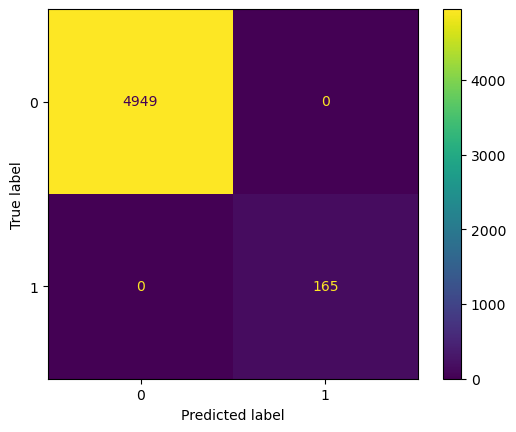

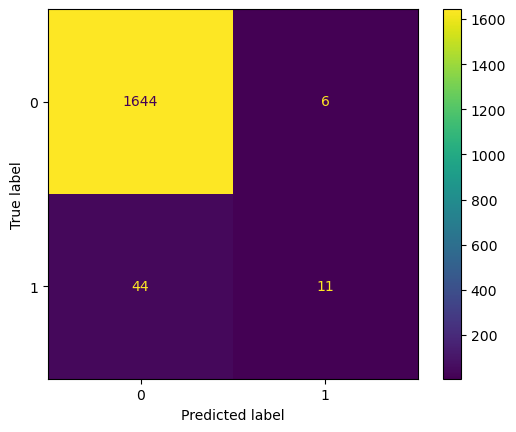

In [51]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing)

### Hypertuning the parameters using Grid Search cv

In [53]:
parameters = {'criterion':["gini", "entropy"],
              'max_depth':[5,6,7],
              'max_features':["auto","sqrt", "log2", None],
              'bootstrap':[True, False],
             }

cv_rf = GridSearchCV(model_rf,
                    param_grid=parameters,
                    cv=10,n_jobs=3)

cv_rf.fit(x_train, y_train)
print("Best Parameters:\n", cv_rf.best_params_)

Best Parameters:
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None}


In [54]:
# Set best parameters given by grid search 
model_rf.set_params(criterion = 'entropy',
                    n_estimators=100,
                    max_depth = 7)

RandomForestClassifier(criterion='entropy', max_depth=7)

### Finding the optimum number of Trees i.e n_estimators using OOB

In [ ]:
model_rf.set_params(warm_start= True, oob_score =True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators+1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(x_train, y_train)
    
    oob_error = 1-model_rf.oob_score_
    error_rate[i]= oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 100 to 1000 trees)')

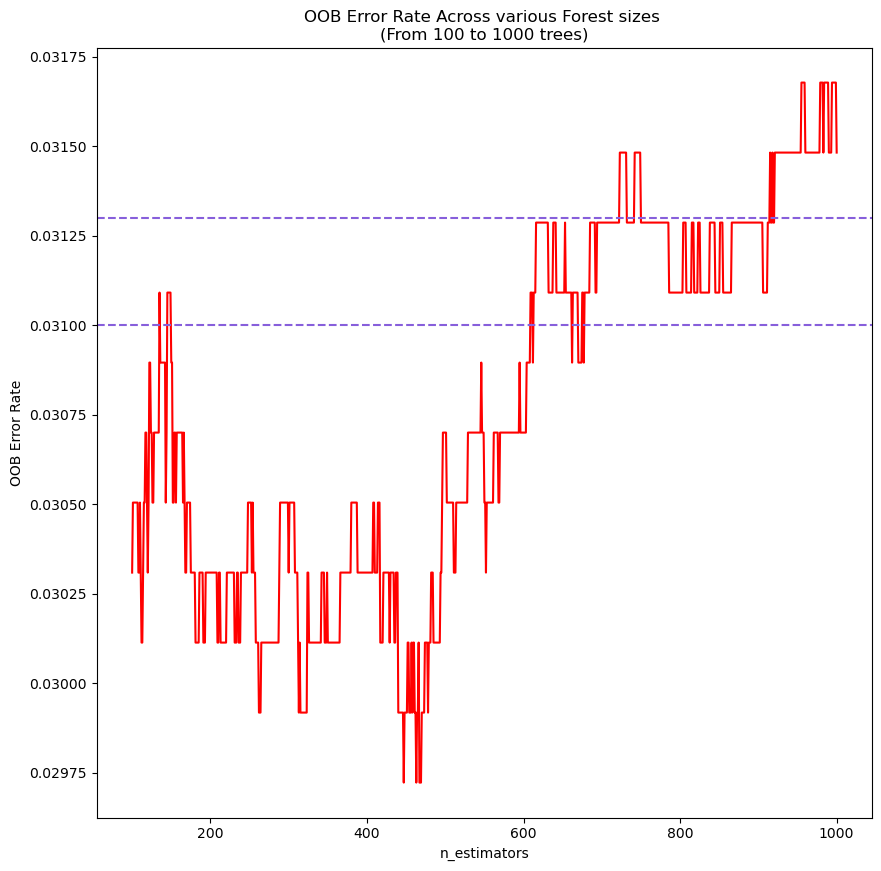

In [56]:
fig= plt.subplots(figsize=(10, 10))

oob_series = pd.Series(error_rate)
oob_series.plot(kind='line',color = 'red')
plt.axhline(0.03100, color='#875FDB',linestyle='--')
plt.axhline(0.03130, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 1000 trees)')

In [55]:
# Refine the Tree via OOB output
model_rf.set_params(n_estimators=775,
                    oob_score=False,
                    warm_start=False,
                    bootstrap= True)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=775)

In [56]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=775)

In [57]:
y_pred_training = model_rf.predict(x_train)
y_pred_testing =model_rf.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing))
print()
print(classification_report(y_train,y_pred_training))
print(classification_report(y_test,y_pred_testing))

Training Accurarcy:  0.986312084473993
Testing Accuracy:  0.967741935483871

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4949
           1       1.00      0.58      0.73       165

    accuracy                           0.99      5114
   macro avg       0.99      0.79      0.86      5114
weighted avg       0.99      0.99      0.98      5114

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.50      0.09      0.15        55

    accuracy                           0.97      1705
   macro avg       0.74      0.54      0.57      1705
weighted avg       0.96      0.97      0.96      1705



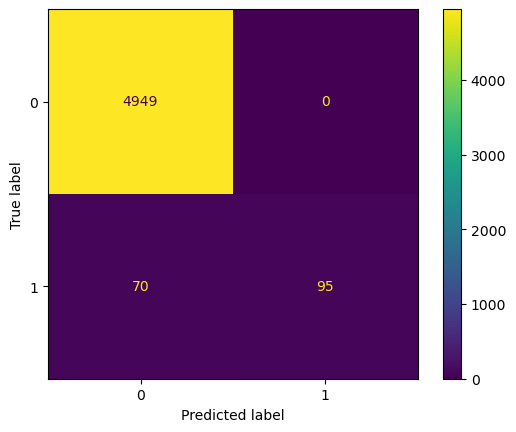

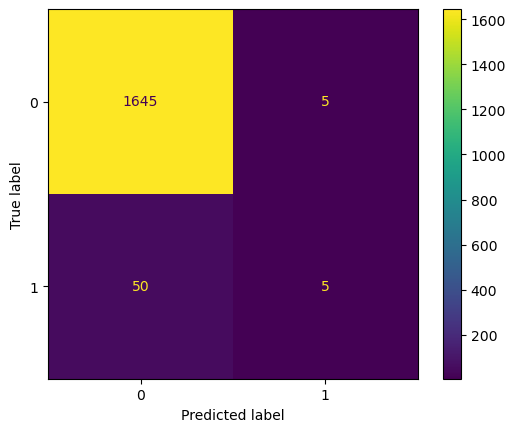

In [58]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing)

### Feature Importance 

In [61]:
feature_rank =pd.DataFrame({"Features":x_train.columns, "Importance":model_rf.feature_importances_})
feature_rank = feature_rank.sort_values('Importance', ascending=False)

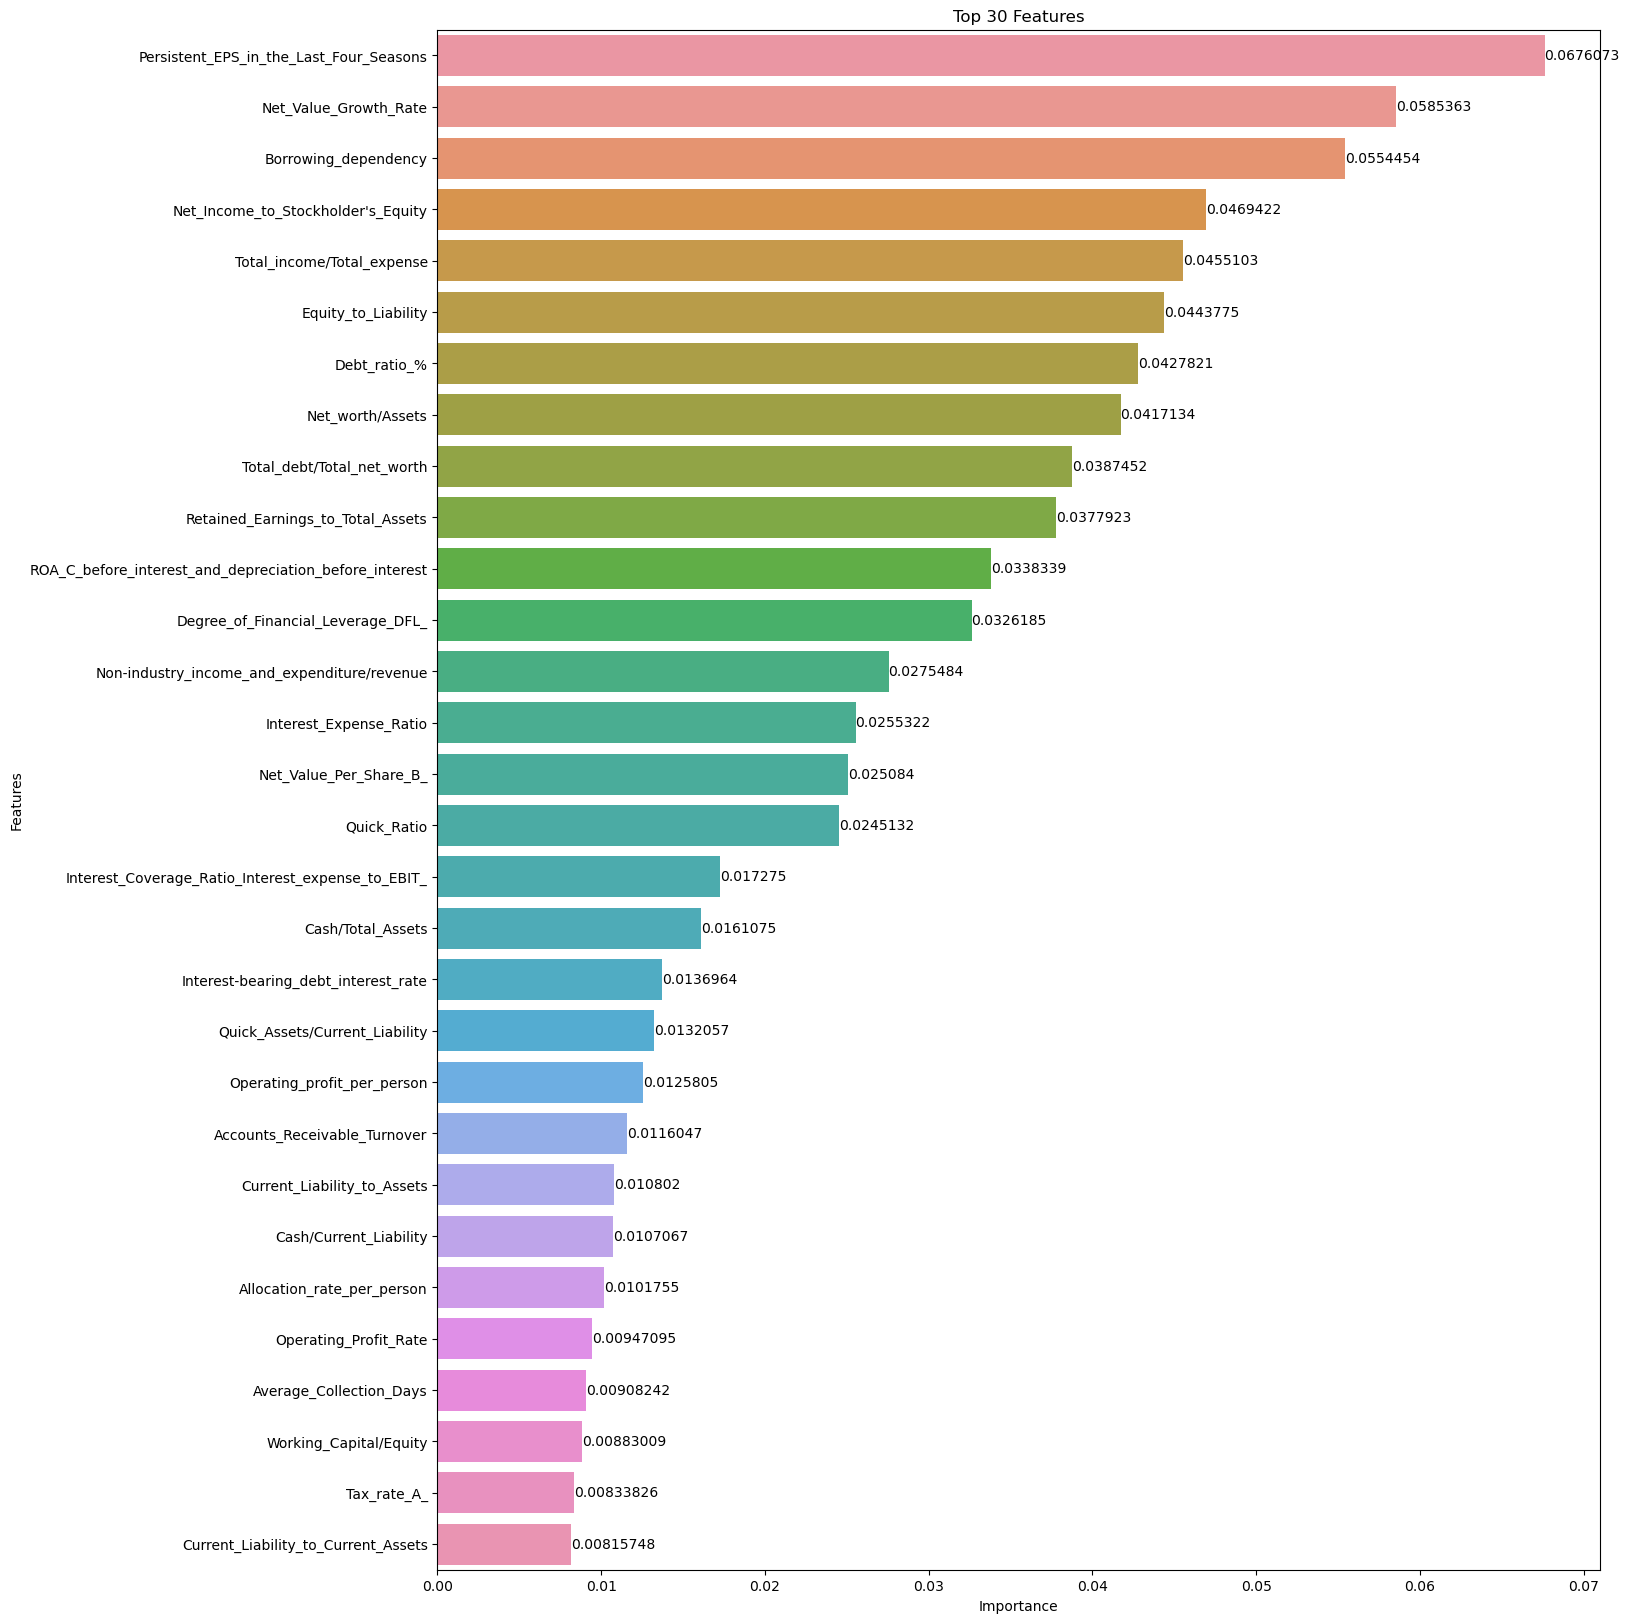

In [62]:
# Top 30 Features
plt.figure(figsize=(15,20))
fig=sns.barplot(x='Importance',y='Features',data=feature_rank.head(30))
plt.xlabel("Importance")
plt.ylabel("Features")
fig.bar_label(fig.containers[0])
plt.title("Top 30 Features")
plt.show()

### 3) Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression 

In [66]:
lr = LogisticRegression()
model_lr = lr.fit(x_train, y_train)

y_pred_training_lr = model_lr.predict(x_train)
y_pred_testing_lr =model_lr.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training_lr))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing_lr))
print()
print(classification_report(y_train,y_pred_training_lr))
print(classification_report(y_test,y_pred_testing_lr))

Training Accurarcy:  0.9677356276886977
Testing Accuracy:  0.967741935483871

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4949
           1       0.00      0.00      0.00       165

    accuracy                           0.97      5114
   macro avg       0.48      0.50      0.49      5114
weighted avg       0.94      0.97      0.95      5114

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705



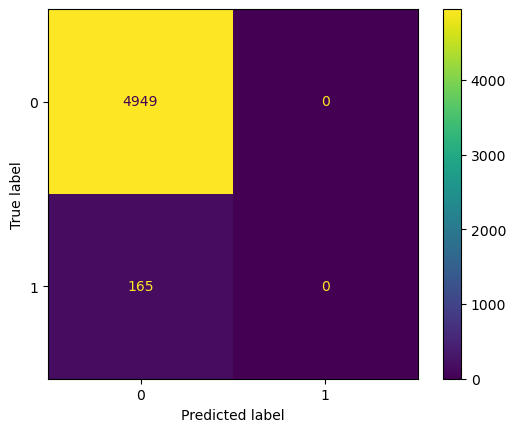

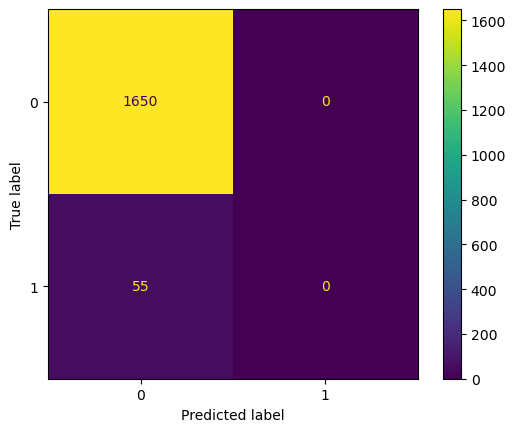

In [67]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training_lr)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing_lr)

### 4) SVM

In [68]:
from sklearn.svm import SVC

In [69]:
svc = SVC()
model_svc = svc.fit(x_train,y_train)

y_pred_training_svc = model_svc.predict(x_train)
y_pred_testing_svc =model_svc.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training_svc))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing_svc))
print()
print(classification_report(y_train,y_pred_training_svc))
print(classification_report(y_test,y_pred_testing_svc))

Training Accurarcy:  0.9677356276886977
Testing Accuracy:  0.967741935483871

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4949
           1       0.00      0.00      0.00       165

    accuracy                           0.97      5114
   macro avg       0.48      0.50      0.49      5114
weighted avg       0.94      0.97      0.95      5114

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705



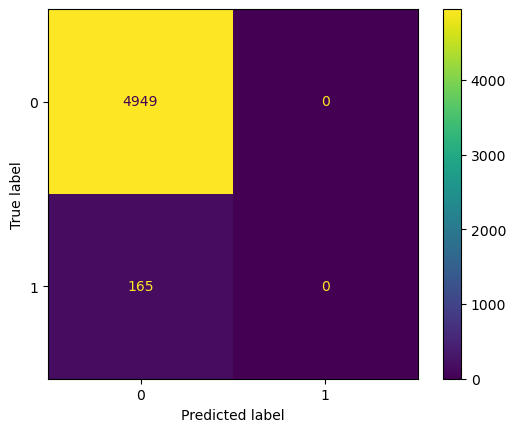

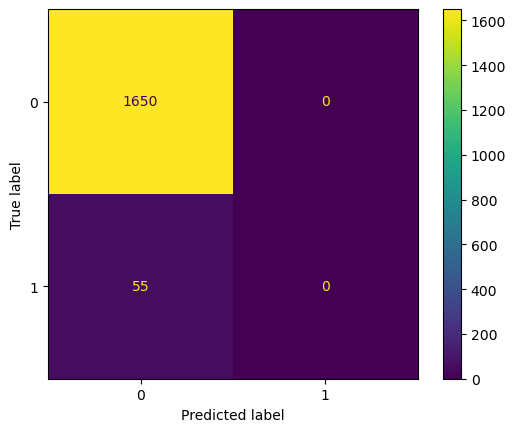

In [70]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training_svc)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing_svc)

### 5) KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier()
model_knn = knn.fit(x_train,y_train)

y_pred_training_knn = model_knn.predict(x_train)
y_pred_testing_knn =model_knn.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training_knn))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing_knn))
print()
print(classification_report(y_train,y_pred_training_knn))
print(classification_report(y_test,y_pred_testing_knn))

Training Accurarcy:  0.9679311693390692
Testing Accuracy:  0.9671554252199414

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4949
           1       0.67      0.01      0.02       165

    accuracy                           0.97      5114
   macro avg       0.82      0.51      0.50      5114
weighted avg       0.96      0.97      0.95      5114

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705



### 6) Naive-Bayes Classifier

In [73]:
from sklearn.naive_bayes import BernoulliNB

In [74]:
nb = BernoulliNB()
model_nb = nb.fit(x_train , y_train)

y_pred_training_nb = model_nb.predict(x_train)
y_pred_testing_nb =model_nb.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training_nb))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing_nb))
print()
print(classification_report(y_train,y_pred_training_nb))
print(classification_report(y_test,y_pred_testing_nb))

Training Accurarcy:  0.966366836136097
Testing Accuracy:  0.9659824046920821

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4949
           1       0.11      0.01      0.01       165

    accuracy                           0.97      5114
   macro avg       0.54      0.50      0.50      5114
weighted avg       0.94      0.97      0.95      5114

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.29      0.04      0.06        55

    accuracy                           0.97      1705
   macro avg       0.63      0.52      0.52      1705
weighted avg       0.95      0.97      0.95      1705



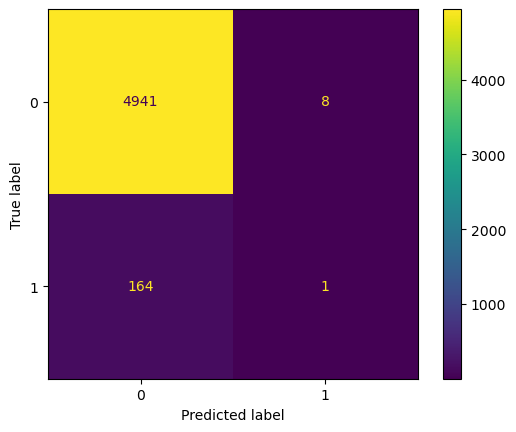

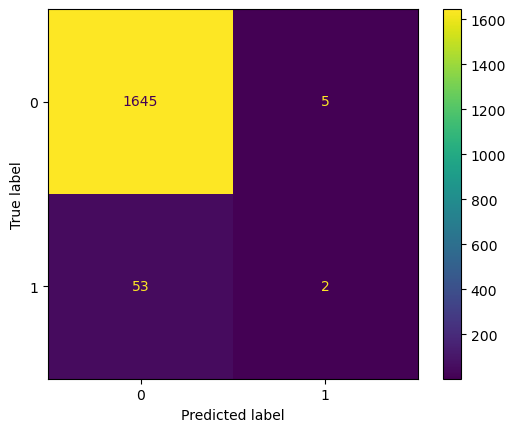

In [75]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training_nb)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing_nb)

### 7) XG-Boost Classifier 

In [79]:
from xgboost import XGBClassifier

In [80]:
xgb = XGBClassifier()
model_xgb = xgb.fit(x_train, y_train)

y_pred_training_xgb = model_xgb.predict(x_train)
y_pred_testing_xgb =model_xgb.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training_xgb))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing_xgb))
print()
print(classification_report(y_train,y_pred_training_xgb))
print(classification_report(y_test,y_pred_testing_xgb))

Training Accurarcy:  1.0
Testing Accuracy:  0.967741935483871

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4949
           1       1.00      1.00      1.00       165

    accuracy                           1.00      5114
   macro avg       1.00      1.00      1.00      5114
weighted avg       1.00      1.00      1.00      5114

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1650
           1       0.50      0.20      0.29        55

    accuracy                           0.97      1705
   macro avg       0.74      0.60      0.63      1705
weighted avg       0.96      0.97      0.96      1705



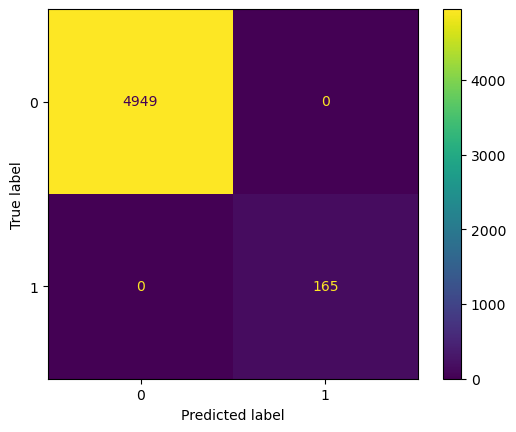

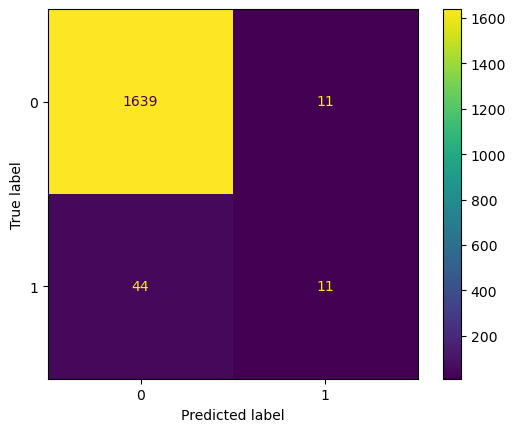

In [81]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training_xgb)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing_xgb)

## Voting Classifier

In [78]:
from sklearn.ensemble import VotingClassifier

In [79]:
voting = VotingClassifier(estimators=[('Dtree_gini',Dtree_tuned),('model_rf',model_rf),('lr',model_lr),('svc',model_svc),
                                      ('knn',model_knn),('nb',model_nb),('xgb',model_xgb)])

voting_classifier = voting.fit(x_train, y_train)

y_pred_train_voting = voting_classifier.predict(x_train)
y_pred_test_voting = voting_classifier.predict(x_test)

# Accuracy
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_voting))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_voting))

# Classification Report 
print("Training Report: \n",classification_report(y_train, y_pred_train_voting))
print("Testing Report: \n",classification_report(y_test, y_pred_test_voting))

Training Accuracy:  0.9677356276886977
Testing Accuracy:  0.967741935483871
Training Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4949
           1       0.00      0.00      0.00       165

    accuracy                           0.97      5114
   macro avg       0.48      0.50      0.49      5114
weighted avg       0.94      0.97      0.95      5114

Testing Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705



## Stacking Classifier 

In [80]:
from sklearn.ensemble import StackingClassifier

In [81]:
estimators = [('DT',Dtree_tuned),('LR',model_lr),('SVM',model_svc),('KNN',model_knn),('BNB',model_nb),('XGB',model_xgb)]  

In [82]:
classifier = StackingClassifier(estimators=estimators, final_estimator=model_rf, cv=10)

In [83]:
classifier.fit(x_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('DT',
                                DecisionTreeClassifier(max_depth=2,
                                                       min_samples_leaf=50,
                                                       min_samples_split=200)),
                               ('LR', LogisticRegression()), ('SVM', SVC()),
                               ('KNN', KNeighborsClassifier()),
                               ('BNB', BernoulliNB()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              d...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          max_depth=5,
                                                          n_estimators=775))

In [84]:
y_pred_train_stacking = classifier.predict(x_train)
y_pred_test_stacking = classifier.predict(x_test)


# Classification Report 
## Training
print(classification_report(y_train, y_pred_train_stacking))
print()
## Testing
print(classification_report(y_test, y_pred_test_stacking))
print()

# Accuracy Score
## Training
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train_stacking))
print()
## Testing
print("Testing Accuracy: ",accuracy_score(y_test, y_pred_test_stacking))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4949
           1       1.00      0.60      0.75       165

    accuracy                           0.99      5114
   macro avg       0.99      0.80      0.87      5114
weighted avg       0.99      0.99      0.99      5114


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1650
           1       0.29      0.07      0.12        55

    accuracy                           0.96      1705
   macro avg       0.63      0.53      0.55      1705
weighted avg       0.95      0.96      0.95      1705


Training Accuracy:  0.9870942510754791

Testing Accuracy:  0.9642228739002933


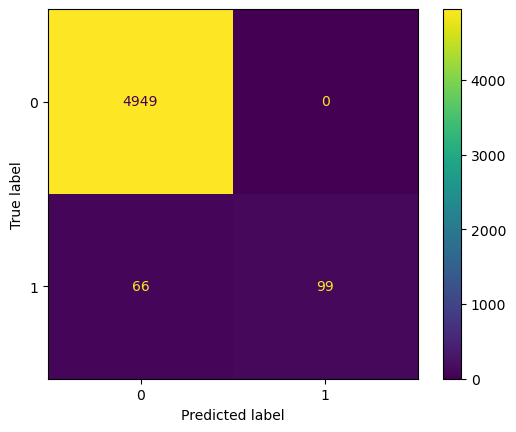

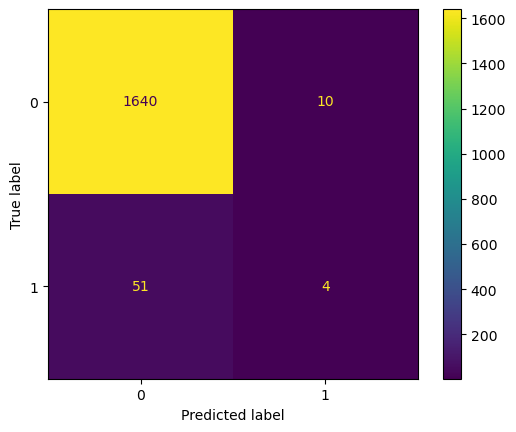

In [85]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_stacking)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_stacking)

### F-1 score comparision 

In [59]:
model_name=["Decision_Tree", "Random_Forest", "Logistic_Regg", "SVM", "KNN", "Naive_Bayes","XG_Boost", "Voting", "Stacking"]
f1_score = [0.49,0.57,0.49,0.49,0.49,0.52,0.63,0.49,0.55]

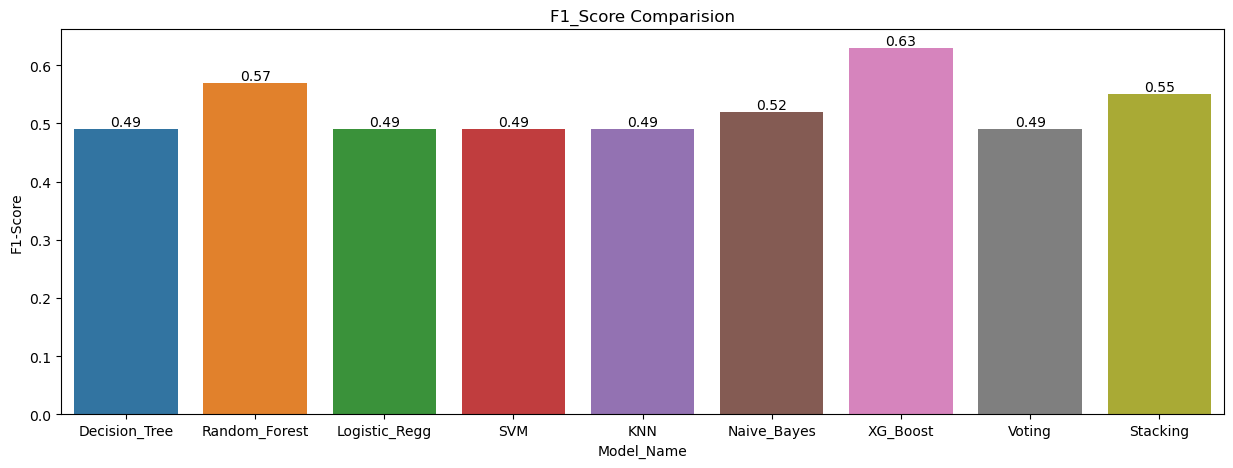

In [60]:
f1_df = pd.DataFrame({"Model_Name":model_name, "F1-Score":f1_score})

plt.figure(figsize=(15,5))
fig=sns.barplot(x="Model_Name",y="F1-Score",data=f1_df)
plt.title("F1_Score Comparision")
plt.bar_label(fig.containers[0])
plt.show()

## Building the models by balancing the Data using SMOTE technique

In [61]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote =SMOTE()
x_train_smote, y_train_smote =smote.fit_resample(x_train,y_train)

In [63]:
y_train_smote.value_counts()

Bankrupt
0           4949
1           4949
dtype: int64

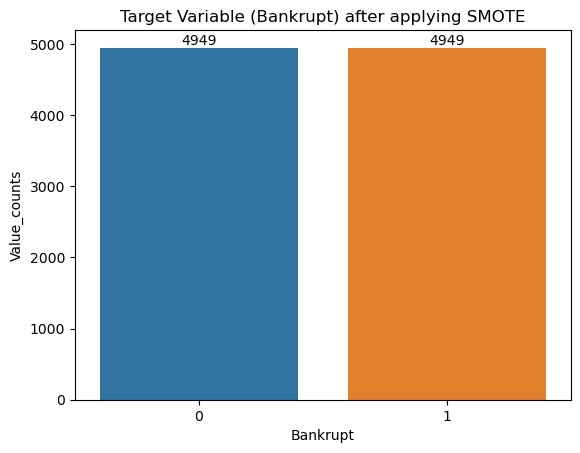

In [64]:
df_smote=pd.DataFrame({"Bankrupt":[0,1],"Value_counts":y_train_smote.value_counts()})
fig=sns.barplot(x="Bankrupt",y="Value_counts", data=df_smote)
fig.bar_label(fig.containers[0])
plt.title("Target Variable (Bankrupt) after applying SMOTE")
plt.show()

In [66]:
print(y_train_smote.value_counts())
print(y_test.value_counts())

Bankrupt
0           4949
1           4949
dtype: int64
Bankrupt
0           1650
1             55
dtype: int64


### 1) Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
Dtree_smote = DecisionTreeClassifier(criterion='gini', 
                                     max_depth=2, 
                                     min_samples_leaf= 50, 
                                     min_samples_split= 200)

In [69]:
tree_smote = Dtree_smote.fit(x_train_smote,y_train_smote)

y_pred_train_dt_smote = tree_smote.predict(x_train)
y_pred_test_dt_smote = tree_smote.predict(x_test)

print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_dt_smote))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_dt_smote))
print()
print("Training Report: \n",classification_report(y_train, y_pred_train_dt_smote))
print("Testing Report: \n",classification_report(y_test, y_pred_test_dt_smote))

Training Accuracy:  0.9382088384825968
Testing Accuracy:  0.9249266862170088

Training Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      4949
           1       0.30      0.68      0.42       165

    accuracy                           0.94      5114
   macro avg       0.64      0.82      0.69      5114
weighted avg       0.97      0.94      0.95      5114

Testing Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      1650
           1       0.23      0.58      0.33        55

    accuracy                           0.92      1705
   macro avg       0.61      0.76      0.65      1705
weighted avg       0.96      0.92      0.94      1705



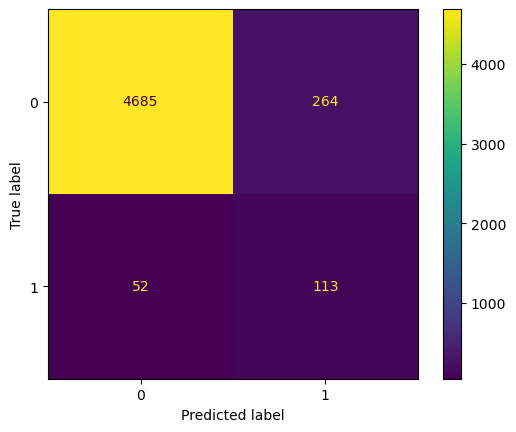

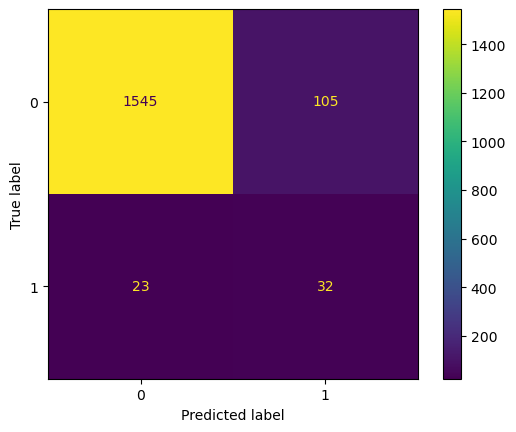

In [70]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_dt_smote)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_dt_smote)

### 2) Random Forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier
smote_rf = RandomForestClassifier(n_estimators=775,
                                  criterion="entropy",
                                  max_depth=5)

In [73]:
smote_rf.fit(x_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=775)

In [74]:
y_pred_train_rf_smote = smote_rf.predict(x_train)
y_pred_test_rf_smote = smote_rf.predict(x_test)

print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_rf_smote))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_rf_smote))
print()
print("Training Report: \n",classification_report(y_train, y_pred_train_rf_smote))
print("Testing Report: \n",classification_report(y_test, y_pred_test_rf_smote))

Training Accuracy:  0.929800547516621
Testing Accuracy:  0.9102639296187683

Training Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96      4949
           1       0.30      0.90      0.45       165

    accuracy                           0.93      5114
   macro avg       0.65      0.91      0.71      5114
weighted avg       0.97      0.93      0.95      5114

Testing Report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1650
           1       0.23      0.75      0.35        55

    accuracy                           0.91      1705
   macro avg       0.61      0.83      0.65      1705
weighted avg       0.97      0.91      0.93      1705



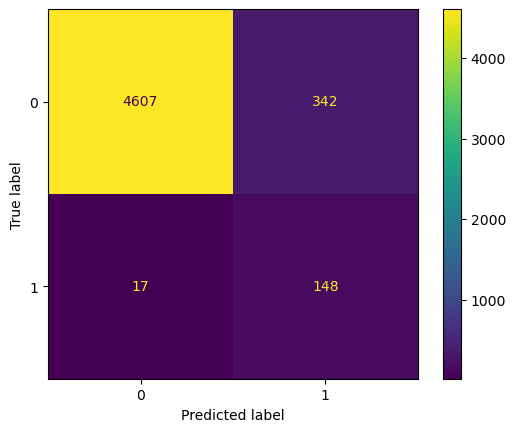

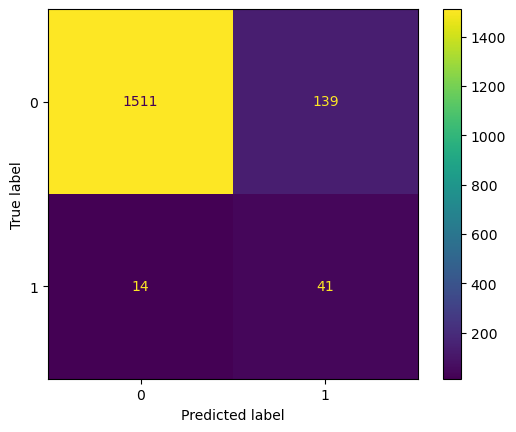

In [75]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_rf_smote)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_rf_smote)

### 3) Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr = LogisticRegression()
smote_lr = lr.fit(x_train_smote, y_train_smote)

y_pred_training_lr_smote = smote_lr.predict(x_train)
y_pred_testing_lr_smote =smote_lr.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training_lr_smote))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing_lr_smote))
print()
print(classification_report(y_train,y_pred_training_lr_smote))
print(classification_report(y_test,y_pred_testing_lr_smote))

Training Accurarcy:  0.7407117716073524
Testing Accuracy:  0.7489736070381232

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      4949
           1       0.05      0.36      0.08       165

    accuracy                           0.74      5114
   macro avg       0.51      0.56      0.47      5114
weighted avg       0.94      0.74      0.82      5114

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1650
           1       0.05      0.40      0.09        55

    accuracy                           0.75      1705
   macro avg       0.51      0.58      0.47      1705
weighted avg       0.94      0.75      0.83      1705



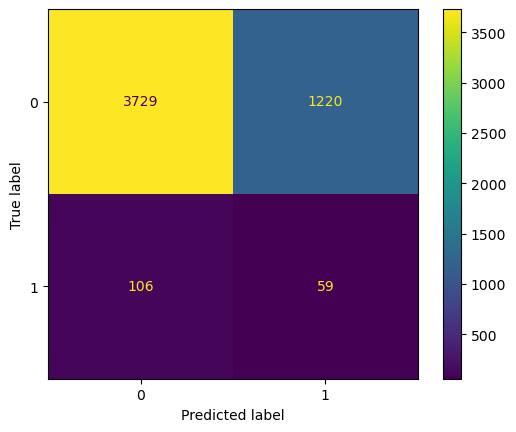

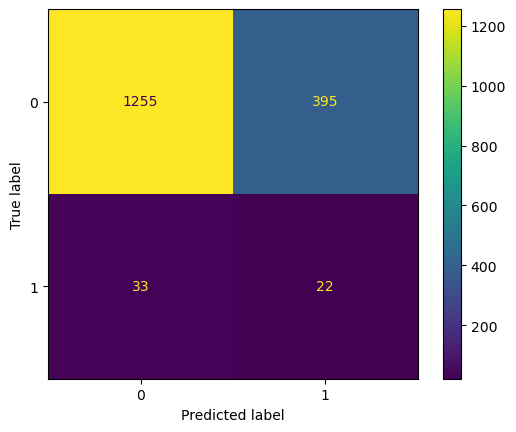

In [79]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training_lr_smote)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing_lr_smote)

### 4) SVM

In [84]:
from sklearn.svm import SVC

In [85]:
svc = SVC()
smote_svc = svc.fit(x_train_smote,y_train_smote)

y_pred_training_svc_smote = smote_svc.predict(x_train)
y_pred_testing_svc_smote = smote_svc.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training_svc_smote))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing_svc_smote))
print()
print(classification_report(y_train,y_pred_training_svc_smote))
print(classification_report(y_test,y_pred_testing_svc_smote))

Training Accurarcy:  0.7340633554947203
Testing Accuracy:  0.7272727272727273

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      4949
           1       0.08      0.74      0.15       165

    accuracy                           0.73      5114
   macro avg       0.54      0.74      0.50      5114
weighted avg       0.96      0.73      0.82      5114

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1650
           1       0.07      0.65      0.13        55

    accuracy                           0.73      1705
   macro avg       0.53      0.69      0.49      1705
weighted avg       0.96      0.73      0.82      1705



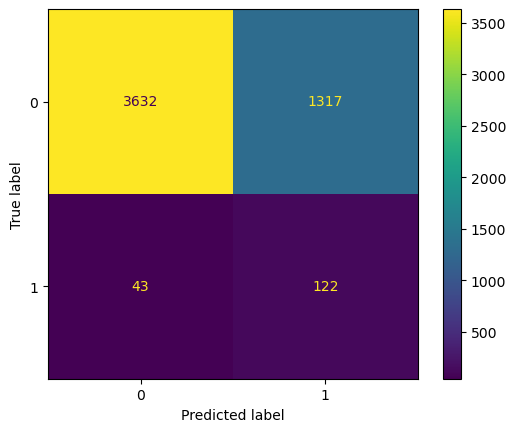

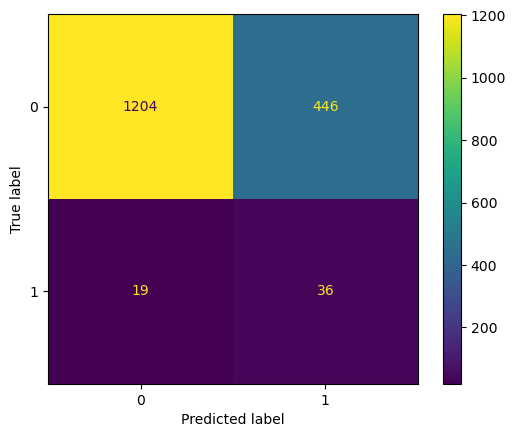

In [86]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training_svc_smote)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing_svc_smote)

### 5) KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier()
smote_knn = knn.fit(x_train_smote,y_train_smote)

y_pred_training_knn_smote = smote_knn.predict(x_train)
y_pred_testing_knn_smote = smote_knn.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training_knn_smote))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing_knn_smote))
print()
print(classification_report(y_train,y_pred_training_knn_smote))
print(classification_report(y_test,y_pred_testing_knn_smote))

Training Accurarcy:  0.8895189675400861
Testing Accuracy:  0.8310850439882698

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4949
           1       0.23      0.99      0.37       165

    accuracy                           0.89      5114
   macro avg       0.61      0.94      0.65      5114
weighted avg       0.97      0.89      0.92      5114

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1650
           1       0.08      0.40      0.13        55

    accuracy                           0.83      1705
   macro avg       0.53      0.62      0.52      1705
weighted avg       0.95      0.83      0.88      1705



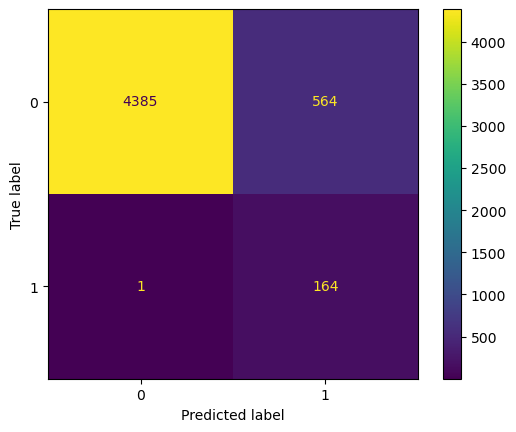

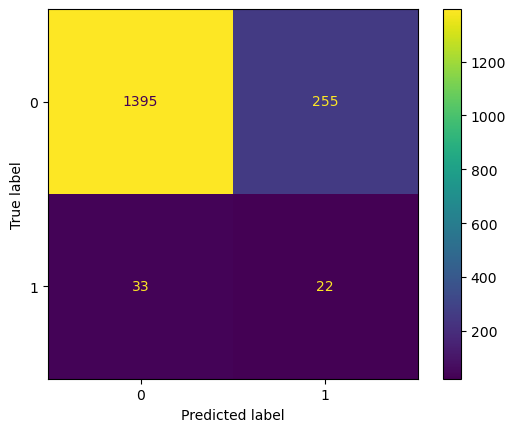

In [91]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training_knn_smote)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing_knn_smote)

### 6) Naive-Bayes  

In [92]:
from sklearn.naive_bayes import BernoulliNB

In [94]:
nb = BernoulliNB()
smote_nb = nb.fit(x_train_smote , y_train_smote)

y_pred_training_nb_smote = smote_nb.predict(x_train)
y_pred_testing_nb_smote = smote_nb.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training_nb_smote))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing_nb_smote))
print()
print(classification_report(y_train,y_pred_training_nb_smote))
print(classification_report(y_test,y_pred_testing_nb_smote))

Training Accurarcy:  0.7764958936253422
Testing Accuracy:  0.7560117302052786

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      4949
           1       0.10      0.70      0.17       165

    accuracy                           0.78      5114
   macro avg       0.54      0.74      0.52      5114
weighted avg       0.96      0.78      0.85      5114

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      1650
           1       0.09      0.67      0.15        55

    accuracy                           0.76      1705
   macro avg       0.54      0.72      0.50      1705
weighted avg       0.96      0.76      0.83      1705



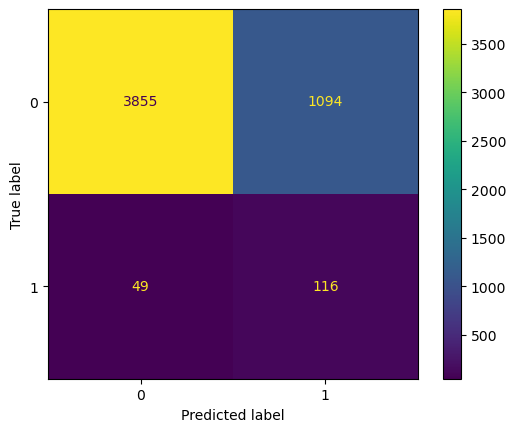

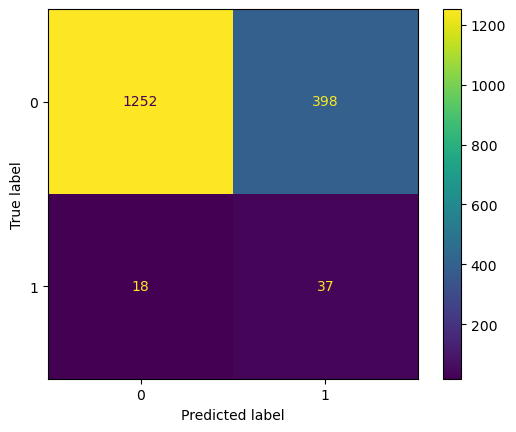

In [95]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training_nb_smote)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing_nb_smote)

### 7)XG-Boost 

In [97]:
from xgboost import XGBClassifier

In [98]:
xgb = XGBClassifier()
smote_xgb = xgb.fit(x_train_smote, y_train_smote)

y_pred_training_xgb_smote = smote_xgb.predict(x_train)
y_pred_testing_xgb_smote = smote_xgb.predict(x_test)

print("Training Accurarcy: ",accuracy_score(y_train, y_pred_training_xgb_smote))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_testing_xgb_smote))
print()
print(classification_report(y_train,y_pred_training_xgb_smote))
print(classification_report(y_test,y_pred_testing_xgb_smote))

Training Accurarcy:  1.0
Testing Accuracy:  0.9624633431085043

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4949
           1       1.00      1.00      1.00       165

    accuracy                           1.00      5114
   macro avg       1.00      1.00      1.00      5114
weighted avg       1.00      1.00      1.00      5114

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1650
           1       0.40      0.31      0.35        55

    accuracy                           0.96      1705
   macro avg       0.69      0.65      0.66      1705
weighted avg       0.96      0.96      0.96      1705



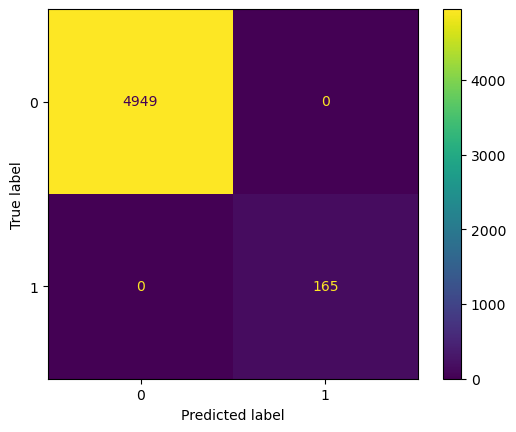

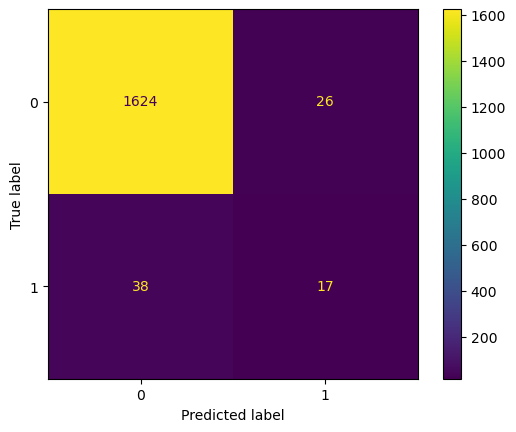

In [99]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_training_xgb_smote)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_testing_xgb_smote)

## Voting Classifier

In [101]:
from sklearn.ensemble import VotingClassifier

In [102]:
voting = VotingClassifier(estimators=[('tree_smote',Dtree_smote),('smote_rf',smote_rf),('lr',smote_lr),('svc',smote_svc),
                                      ('knn',smote_knn),('nb',smote_nb),('xgb',smote_xgb)])

voting_classifier = voting.fit(x_train_smote, y_train_smote)

y_pred_train_voting_smote = voting_classifier.predict(x_train)
y_pred_test_voting_smote = voting_classifier.predict(x_test)

# Accuracy
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_voting_smote))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_voting_smote))

# Classification Report 
print("Training Report: \n",classification_report(y_train, y_pred_train_voting_smote))
print("Testing Report: \n",classification_report(y_test, y_pred_test_voting_smote))

Training Accuracy:  0.9560031286664059
Testing Accuracy:  0.9313782991202346
Training Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      4949
           1       0.41      0.88      0.56       165

    accuracy                           0.96      5114
   macro avg       0.71      0.92      0.77      5114
weighted avg       0.98      0.96      0.96      5114

Testing Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1650
           1       0.25      0.55      0.34        55

    accuracy                           0.93      1705
   macro avg       0.62      0.74      0.65      1705
weighted avg       0.96      0.93      0.94      1705



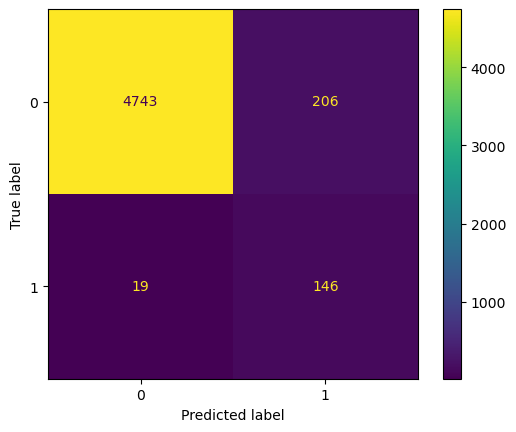

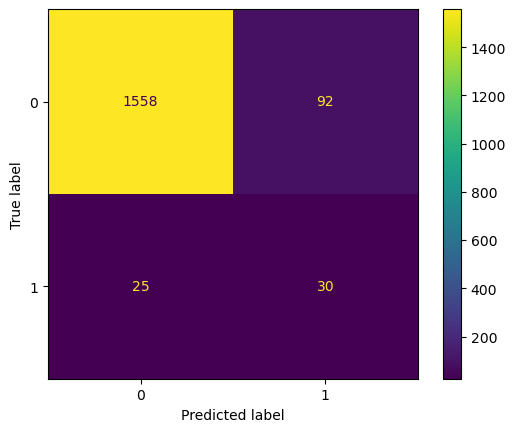

In [103]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_voting_smote)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_voting_smote)

## Stacking Classifier

In [104]:
from sklearn.ensemble import StackingClassifier

In [105]:
estimators = [('tree_smote',Dtree_smote),('lr',smote_lr),('svc',smote_svc),('knn',smote_knn),('nb',smote_nb),
              ('xgb',smote_xgb)] 

In [106]:
classifier = StackingClassifier(estimators=estimators, final_estimator=smote_rf, cv=10)

In [107]:
classifier.fit(x_train_smote, y_train_smote)

StackingClassifier(cv=10,
                   estimators=[('tree_smote',
                                DecisionTreeClassifier(max_depth=2,
                                                       min_samples_leaf=50,
                                                       min_samples_split=200)),
                               ('lr', LogisticRegression()), ('svc', SVC()),
                               ('knn', KNeighborsClassifier()),
                               ('nb', BernoulliNB()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          max_depth=5,
                                                          n_estimators=775))

In [108]:
y_pred_train_stacking_smote = classifier.predict(x_train)
y_pred_test_stacking_smote = classifier.predict(x_test)


# Classification Report 
## Training
print(classification_report(y_train, y_pred_train_stacking_smote))
print()
## Testing
print(classification_report(y_test, y_pred_test_stacking_smote))
print()

# Accuracy Score
## Training
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train_stacking_smote))
print()
## Testing
print("Testing Accuracy: ",accuracy_score(y_test, y_pred_test_stacking_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4949
           1       1.00      0.99      1.00       165

    accuracy                           1.00      5114
   macro avg       1.00      1.00      1.00      5114
weighted avg       1.00      1.00      1.00      5114


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.33      0.07      0.12        55

    accuracy                           0.97      1705
   macro avg       0.65      0.53      0.55      1705
weighted avg       0.95      0.97      0.95      1705


Training Accuracy:  0.9998044583496285

Testing Accuracy:  0.9653958944281525


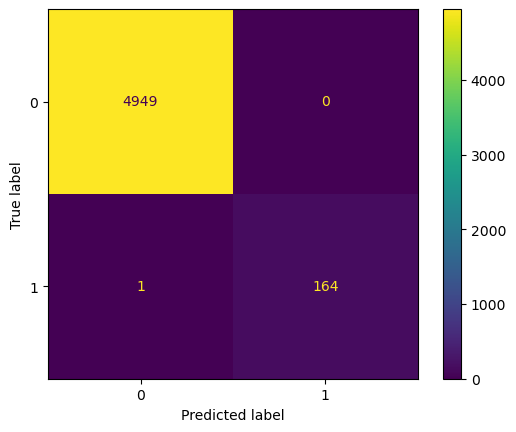

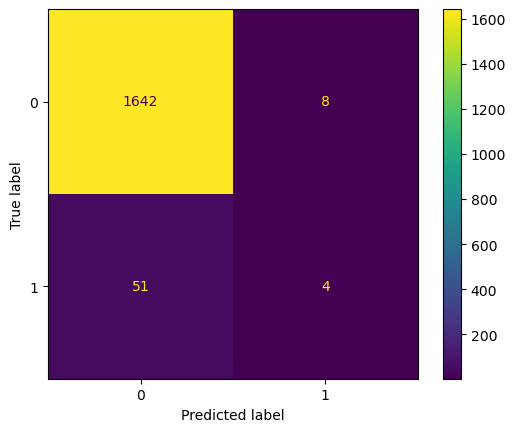

In [109]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_stacking_smote)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_stacking_smote)

## F1-Score_SMOTE Comparision

In [110]:
model_name=["Decision_Tree", "Random_Forest", "Logistic_Regg", "SVM", "KNN", "Naive_Bayes","XG_Boost", "Voting", "Stacking"]
f1_score_smote=[0.65,0.65,0.47,0.49,0.52,0.50,0.66,0.65,0.55]

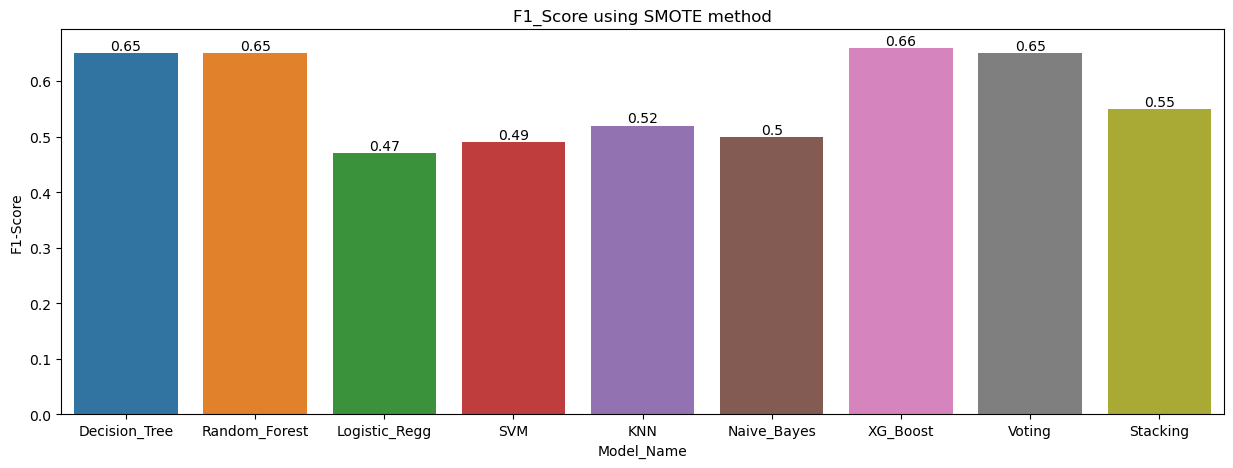

In [111]:
f1_smote = pd.DataFrame({"Model_Name":model_name, "F1-Score":f1_score_smote})

plt.figure(figsize=(15,5))
fig=sns.barplot(x="Model_Name",y="F1-Score",data=f1_smote)
plt.title("F1_Score using SMOTE method")
plt.bar_label(fig.containers[0])
plt.show()

## F1-Score with and Without SMOTE method

In [112]:
df = pd.DataFrame({"Model_Name":model_name, "F1_score":f1_score, "F1_score(SMOTE)":f1_score_smote})
df

,Model_Name,F1_score,F1_score(SMOTE)
0,Decision_Tree,0.49,0.65
1,Random_Forest,0.57,0.65
2,Logistic_Regg,0.49,0.47
3,SVM,0.49,0.49
4,KNN,0.49,0.52
5,Naive_Bayes,0.52,0.50
6,XG_Boost,0.63,0.66
7,Voting,0.49,0.65
8,Stacking,0.55,0.55
